# Проект для «Викишоп» с BERT

Интернет-магазин «Викишоп» запускает новый сервис. Теперь пользователи могут редактировать и дополнять описания товаров, как в вики-сообществах. То есть клиенты предлагают свои правки и комментируют изменения других. Магазину нужен инструмент, который будет искать токсичные комментарии и отправлять их на модерацию. 

Обучим модель классифицировать комментарии на позитивные и негативные. В нашем распоряжении набор данных с разметкой о токсичности правок.

Постараемся построить модель со значением метрики качества *F1* не меньше 0.75. 

**План по выполнению проекта:**

1. Загрузим и подготовим данные.
2. Обучим разные модели. 
3. Сделаем выводы.

Будем использовать модель BERT для создания признаков.

**Из документации к данным:**

Столбец *text* — содержит текст комментария, а *toxic* — целевой признак.

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Функции-для-ресемплирования" data-toc-modified-id="Функции-для-ресемплирования-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Функции для ресемплирования</a></span></li></ul></li><li><span><a href="#Обучение" data-toc-modified-id="Обучение-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение</a></span><ul class="toc-item"><li><span><a href="#Dummy" data-toc-modified-id="Dummy-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dummy</a></span></li><li><span><a href="#Logistic" data-toc-modified-id="Logistic-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Logistic</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-ресемплирования" data-toc-modified-id="Подбор-параметров-ресемплирования-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Подбор параметров ресемплирования</a></span></li><li><span><a href="#Подбор-параметров-для-модели" data-toc-modified-id="Подбор-параметров-для-модели-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Подбор параметров для модели</a></span></li><li><span><a href="#Обучение-и-тестирование-моделей" data-toc-modified-id="Обучение-и-тестирование-моделей-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Обучение и тестирование моделей</a></span></li><li><span><a href="#Подбор-оптимального-порога" data-toc-modified-id="Подбор-оптимального-порога-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Подбор оптимального порога</a></span></li></ul></li><li><span><a href="#CatBoost-с-Bert" data-toc-modified-id="CatBoost-с-Bert-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost с Bert</a></span><ul class="toc-item"><li><span><a href="#Подбор-параметров-ресемплирования" data-toc-modified-id="Подбор-параметров-ресемплирования-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Подбор параметров ресемплирования</a></span></li><li><span><a href="#Обучение-и-тестирование-модели" data-toc-modified-id="Обучение-и-тестирование-модели-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Обучение и тестирование модели</a></span></li><li><span><a href="#Подбор-оптимального-порога" data-toc-modified-id="Подбор-оптимального-порога-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Подбор оптимального порога</a></span></li></ul></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>CatBoost</a></span><ul class="toc-item"><li><span><a href="#Создание-признаков" data-toc-modified-id="Создание-признаков-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Создание признаков</a></span></li><li><span><a href="#Подбор-параметров-ресемплирования" data-toc-modified-id="Подбор-параметров-ресемплирования-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Подбор параметров ресемплирования</a></span></li><li><span><a href="#Обучение-и-тестирование-модели" data-toc-modified-id="Обучение-и-тестирование-модели-2.4.3"><span class="toc-item-num">2.4.3&nbsp;&nbsp;</span>Обучение и тестирование модели</a></span></li><li><span><a href="#Подбор-оптимального-порога" data-toc-modified-id="Подбор-оптимального-порога-2.4.4"><span class="toc-item-num">2.4.4&nbsp;&nbsp;</span>Подбор оптимального порога</a></span></li></ul></li></ul></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Подготовка

### Загрузка и изучение данных

Импортируем библиотеки:

In [2]:
import re
import math
import string
import warnings
from typing import Optional
from threading import Thread

import torch
import transformers
import numpy as np
import pandas as pd
from tqdm.notebook import tqdm
from joblib import parallel_backend
from matplotlib import pyplot as plt
from catboost import CatBoostClassifier
from sklearn.utils import shuffle
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, make_scorer, classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import (
    train_test_split,
    cross_val_score,
    cross_val_predict,
    GridSearchCV,
)

2022-05-15 20:40:49.694609: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-15 20:40:49.694628: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Отключим предупреждения:

In [3]:
warnings.filterwarnings('ignore')

Загрузим данные:

In [4]:
df = pd.read_csv('~/DS/Datasets/toxic_comments.csv')

Изучим первые десять строк:

In [5]:
df.head(10)

,text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0
5,"""\n\nCongratulations from me as well, use the ...",0
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1
7,Your vandalism to the Matt Shirvington article...,0
8,Sorry if the word 'nonsense' was offensive to ...,0
9,alignment on this subject and which are contra...,0


Изучим информацию о таблице:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    159571 non-null  object
 1   toxic   159571 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ MB


Проверим наличие дубликатов:

In [7]:
df.duplicated().mean()

0.0

Изучим целевой признак:

In [8]:
df.describe(include='all')

,text,toxic
count,159571,159571.000000
unique,159571,NaN
top,Explanation\nWhy the edits made under my usern...,NaN
freq,1,NaN
mean,NaN,0.101679
std,NaN,0.302226
min,NaN,0.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,0.000000


Построим график по целевому признаку:

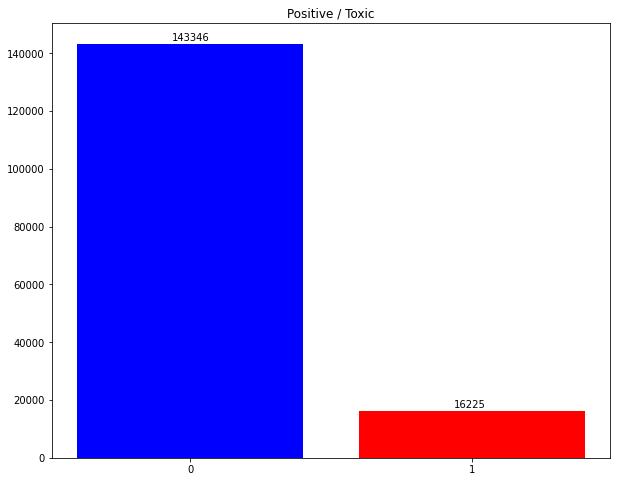

In [9]:
figure, axes = plt.subplots(figsize=(10, 8))
values = df['toxic'].value_counts()
plt.bar([0, 1], values, color=['blue', 'red'])
plt.xticks([0, 1])
for index, value in enumerate(values):
    plt.text(index - 0.065, value + 1000, value)
plt.title('Positive / Toxic')
plt.show()

Давайте вычислим в процентах количество не токсичных комментариев:

In [10]:
len(df[df['toxic'] == 0]) / len(df)

0.8983211235124177

Мы заметили довольно большой дисбаланс классов в сторону положительных комментариев, в дальнейшем, после токенизации попробуем использовать технику для устранения дисбаланса: upsamling (пересемплирование).

### Создание признаков

Чтобы преобразовать текст в признаки, для начала создадим экземпляр BertTokenaizer:

In [11]:
# tokenizer = transformers.BertTokenizer(
#     vocab_file='./bert/vocab.txt'
# )

In [12]:
tokenizer = transformers.DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Напишем функцию для очистки текста:

In [13]:
def clean(text: str) -> str:
    """
    Принимает на вход строку, очищает её от мусорных данных,
    после вовзвращает очищенную строку.
    """
    text = text.lower()
    # Удаляем всё в квадратных скобках, включая сами скобки
    text = re.sub(r'\[.*?\]', '', text)
    # Удаляем все в треугольных скобках, включая сами скобки
    text = re.sub(r'<.*?>+', '', text)
    # Удаляем все ссылки
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Удаляем все слова с цифрами внутри
    text = re.sub(r'\w*\d\w*', '', text)
    # Заменим переводы строк на пробелы
    text = re.sub(r'\n', ' ', text)
    # Удаляем все оставшиеся символы
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Очистим текст от лишних пробелов
    text = ' '.join(text.split())
    return text

Применим очистку:

In [14]:
%%time

tokenized = df['text'].apply(clean)

CPU times: user 6.29 s, sys: 24 ms, total: 6.32 s
Wall time: 6.32 s


Сравним начальные комментарии и то, что получилось:

In [15]:
display(df['text'].head())
display(tokenized.head())

0    Explanation\nWhy the edits made under my usern...
1    D'aww! He matches this background colour I'm s...
2    Hey man, I'm really not trying to edit war. It...
3    "\nMore\nI can't make any real suggestions on ...
4    You, sir, are my hero. Any chance you remember...
Name: text, dtype: object

0    explanation why the edits made under my userna...
1    daww he matches this background colour im seem...
2    hey man im really not trying to edit war its j...
3    more i cant make any real suggestions on impro...
4    you sir are my hero any chance you remember wh...
Name: text, dtype: object

Закодируем все признаки, так как BERT не поддерживает длинну вектора больше 512, ограничим наш результат:

In [16]:
%%time

tokenized = tokenized.apply(
    lambda text: tokenizer.encode(
        text, add_special_tokens=True, truncation=True, max_length=512,
    )
)

CPU times: user 1min 45s, sys: 53.6 ms, total: 1min 45s
Wall time: 1min 45s


Вычислим максимальную длинну, она не должна превышать 512:

In [17]:
max_length = 0
for vector in tokenized:
    length = len(vector)
    if length > max_length:
        max_length = length
max_length

512

Загрузим целевой признак в отдельную переменную:

In [18]:
target = df['toxic']

Разделим выборки на две части:

- Тренировочную и валидационную (80%)
- Тестовую (20%)

Приступим:

In [19]:
%%time

features_train_cv, features_test, target_train_cv, target_test = train_test_split(
    tokenized, target, test_size=0.2, random_state=1,
)

CPU times: user 11.1 ms, sys: 0 ns, total: 11.1 ms
Wall time: 10.9 ms


Проверим проделанную работу:

In [20]:
total = len(features_train_cv) + len(features_test)
print(f'Train: {len(features_train_cv) / total:.2%}')
print(f'Test: {len(features_test) / total:.2%}')

Train: 80.00%
Test: 20.00%


Напишем функцию для добавления нулей векторам:

In [21]:
def add_padding(vectors: pd.DataFrame | pd.Series, max_length: int) -> np.array:
    return np.array([vector + [0] * (max_length - len(vector)) for vector in vectors])

Добавим нули нашим векторам, чтобы у всех было одинаковое количество признаков:

In [22]:
%%time

paddeds_train = add_padding(features_train_cv, max_length)
paddeds_test = add_padding(features_test, max_length)

CPU times: user 3.29 s, sys: 127 ms, total: 3.41 s
Wall time: 3.41 s


Создадим функцию для создания масок:

In [23]:
def create_masks(paddeds: np.array) -> list:
    return np.array([list(np.where(padded != 0, 1, 0)) for padded in paddeds])

Создадим маски:

In [24]:
%%time

masks_train = create_masks(paddeds_train)
masks_test = create_masks(paddeds_test)

CPU times: user 4.92 s, sys: 549 ms, total: 5.47 s
Wall time: 5.47 s


Загрузим конфиг и модель:

In [133]:
model = transformers.DistilBertModel.from_pretrained('distilbert-base-uncased')

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [26]:
# config = transformers.BertConfig.from_json_file('./bert/bert_config.json')
# model = transformers.BertForPreTraining.from_pretrained('./bert/bert_model.ckpt.index', config=config, from_tf=True)

Переведём модель на видеокарту:

In [134]:
model.to('cuda:0')

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0): TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Linear(i

Напишем функцию для создания эмбеддингов, их мы будем делать партиями, чтобы видеопамяти на карточке хватило:

In [28]:
def create_embeddings(paddeds: np.array, masks: list, batch_size: Optional[int] = 4) -> list:
    embeddings = []
    for index in tqdm(range(math.ceil(len(paddeds) / batch_size))):
        left, right = batch_size * index, batch_size * (index + 1)
        batch = torch.LongTensor(paddeds[left:right]).cuda()
        batch_masks = torch.LongTensor(masks[left:right]).cuda()
        with torch.no_grad():
            batch_embeddings = model(batch, attention_mask=batch_masks)
        embeddings.append(batch_embeddings[0][:, 0, :].cpu().numpy())
    return embeddings

Создадим эмбеддинги для тренировочной выборки:

In [135]:
embeddings_train = create_embeddings(paddeds_train, masks_train)

  0%|          | 0/31914 [00:00<?, ?it/s]

Теперь для тестовой:

In [136]:
embeddings_test = create_embeddings(paddeds_test, masks_test)

  0%|          | 0/7979 [00:00<?, ?it/s]

Соберём все эмбеддинги и сделаем из них признаки:

In [137]:
features_train_cv = np.concatenate(embeddings_train)
features_test = np.concatenate(embeddings_test)

Изучим полученые результаты:

In [138]:
features_train_cv

array([[-0.01594742,  0.04874046,  0.09089076, ..., -0.16904224,
         0.4200787 ,  0.46743494],
       [ 0.04974288,  0.09716151, -0.05694747, ..., -0.21864972,
         0.45344293,  0.37281793],
       [-0.03217083,  0.04122206, -0.25705728, ...,  0.09147396,
         0.5219908 ,  0.23010065],
       ...,
       [-0.20425053, -0.19243076, -0.14251375, ..., -0.14861937,
         0.22617824,  0.398374  ],
       [-0.40452555, -0.11225336, -0.1326448 , ..., -0.11819816,
         0.18100469,  0.41376764],
       [-0.08622479,  0.11496441, -0.1309822 , ..., -0.13346972,
         0.39343607,  0.37132093]], dtype=float32)

Переведём полученные данные в DataFrame:

In [139]:
features_train_cv = pd.DataFrame(features_train_cv)
features_test = pd.DataFrame(features_test)

Проверим:

In [140]:
features_train_cv.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.015947,0.048740,0.090891,-0.116920,-0.182333,-0.262841,0.361513,0.430451,0.202208,-0.440022,...,0.208584,-0.142682,0.044144,-0.319188,0.217731,0.079623,0.001828,-0.169042,0.420079,0.467435
1,0.049743,0.097162,-0.056947,-0.057511,-0.097479,-0.310558,0.453450,0.399221,-0.174207,-0.389547,...,0.261317,-0.230988,0.020684,-0.485501,0.180071,0.135631,-0.004147,-0.218650,0.453443,0.372818
2,-0.032171,0.041222,-0.257057,-0.204931,-0.418560,-0.096043,0.331405,0.265694,-0.211419,-0.186915,...,0.206308,-0.276005,-0.078546,-0.243812,0.234700,0.114665,-0.328208,0.091474,0.521991,0.230101
3,-0.187169,-0.138597,0.021118,-0.041047,-0.081607,-0.509457,0.254029,0.502379,-0.222136,-0.219849,...,0.057686,-0.102063,-0.104269,-0.300135,0.129854,0.048698,-0.291306,-0.029962,0.505928,0.476574
4,-0.110749,0.084532,0.111475,-0.185015,-0.159748,-0.072469,0.311522,0.347092,-0.170410,0.021779,...,-0.069876,-0.249787,-0.093828,-0.139125,0.247102,0.063402,-0.141503,-0.038341,0.272248,0.364014


Чтобы индексы совпадали сбросим индексы у целевых признаков:

In [141]:
target_train_cv.reset_index(drop=True, inplace=True)
target_test.reset_index(drop=True, inplace=True)

Для некоторых операций нам понадобиться валидационная выборка, поэтому разделим нашу тренировочную выборку на две:

In [142]:
features_train, features_valid, target_train, target_valid = train_test_split(
    features_train_cv, target_train_cv, test_size=0.2, random_state=1,
)

Создадим scorer для кросс-валидации:

In [143]:
scorer = make_scorer(f1_score)

### Функции для ресемплирования

Чтобы применить технику upsampling для тренировочных выборок напишем функцию, в дальнейшем мы подберём к ней параметр `repeat`:

In [144]:
def upsample(features: pd.DataFrame, target: pd.Series,
             classes: Optional[list] = [0, 1],
             upsample_class: Optional[int] = 1,
             repeat: Optional[int] = 4) -> tuple[pd.DataFrame, pd.Series]:
    """
    Принимает на вход признаки, целевой признак, а также
    дополнительные параметры в виде списка классов,
    какой класс нужно увеличить и во сколько раз.
    Возвращает новые пересемплированные признаки и
    целевой признак.
    """
    if upsample_class not in classes:
        raise ValueError('Wrong upsample class!')
    features_by_classes = {}
    target_by_classes = {}
    for class_ in classes:
        features_by_classes[class_] = features[target == class_]
        target_by_classes[class_] = target[target == class_]
    features_upsampled = pd.concat(
        [features_by_classes[class_] for class_ in classes if class_ != upsample_class]
        + [features_by_classes[upsample_class]] * repeat
    )
    target_upsampled = pd.concat(
        [target_by_classes[class_] for class_ in classes if class_ != upsample_class]
        + [target_by_classes[upsample_class]] * repeat
    )
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=1,
    )
    return features_upsampled, target_upsampled

Также напишем функцию downsample, если upsample нам не поможет:

In [145]:
def downsample(features: pd.DataFrame, target: pd.Series,
               classes: Optional[list] = [0, 1],
               downsample_class: Optional[int] = 0,
               fraction: Optional[int] = 0.1) -> tuple[pd.DataFrame, pd.Series]:
    """
    Принимает на вход признаки, целевой признак, а также
    дополнительные параметры в виде списка классов,
    какой класс нужно уменьшить и размер фракции.
    Возвращает новые недосемплированные признаки и
    целевой признак.
    """
    if downsample_class not in classes:
        raise ValueError('Wrong upsample class!')
    features_by_classes = {}
    target_by_classes = {}
    for class_ in classes:
        features_by_classes[class_] = features[target == class_]
        target_by_classes[class_] = target[target == class_]
    features_downsampled = pd.concat(
        [features_by_classes[class_] for class_ in classes if class_ != downsample_class]
        + [features_by_classes[downsample_class].sample(frac=fraction, random_state=1)]
    )
    target_downsampled = pd.concat(
        [target_by_classes[class_] for class_ in classes if class_ != downsample_class]
        + [target_by_classes[downsample_class].sample(frac=fraction, random_state=1)]
    )
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=1,
    )
    return features_downsampled, target_downsampled

**Вывод**

Нам удалось с помощью предобученой модели Bert создать матрицу признаков, теперь мы можем использовать её для обучения.

## Обучение

Сегодня мы обучим и замерим F1-меру у четырёх моделей, одна из них будет фиктивная, для того, чтобы нам было от чего отталкиваться:

- Dummy (Константная)
- Logistic
- CatBoost с Bert
- CatBoost

### Dummy

Создадим модель:

In [146]:
model = DummyClassifier(strategy='constant', constant=1)

Выполним кросс-валидацию:

In [147]:
scores = cross_val_score(model, features_train_cv, target_train_cv, scoring=scorer, cv=3)
scores

array([0.18417684, 0.18421558, 0.18421558])

Посчитаем среднее:

In [148]:
scores.mean()

0.18420266542090422

Обучим модель:

In [149]:
model.fit(features_train_cv, target_train_cv)

DummyClassifier(constant=1, strategy='constant')

Выполним предсказание на тестовой выборке:

In [150]:
predicted_test = model.predict(features_test)

Посчитаем F1-меру на тестовой выборке:

In [151]:
f1_score(target_test, predicted_test)

0.18613242398408636

**Вывод**

Мы получили базовое значение, теперь мы сможем делать выводы об адекватности наших моделей.

### Logistic

#### Подбор параметров ресемплирования

Для начала давайте попробуем подобрать параметр `repeat` для техники upsample, для этого напишем функцию, так как для CatBoost она нам тоже пригодиться:

In [160]:
def select_best_value(model_class, features, target, function,
                      select_param='repeat', values=range(1, 10),
                      scorer=scorer, params={'random_state': 1},
                      eval_fit=False):
    """
    Функция на вход принимает класс модели, признаки и целевой признак,
    функцию для семплирования, она должна уметь принимать аргументы: признаков,
    целевого признака и аргумент указанный в select_param, и возвращать
    новые признаки и целевой признак. Необязательные параметры: итерируемый
    объект для перебора параметра repeat, scorer для вычисления счёта модели
    и параметры в виде словаря для модели.
    Во время выполнения функция распечатывает найденые промежуточные
    лучшие результаты кросс-валидации, а в конце возвращает лучшую среднюю
    F1-меру и количество repeat для неё.
    """
    best_score = 0
    best_value = 0
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.2, random_state=1,
    )
    fit_params = {}
    if eval_fit:
        fit_params = {'eval_set': (features_valid, target_valid)}
    with parallel_backend('threading', n_jobs=3):
        for value in values:
            model = model_class(**params)
            features_sampled, target_sampled = function(
                features_train, target_train, **{select_param: value},
            )
            model.fit(features_sampled, target_sampled, **fit_params)
            predicted_valid = model.predict(features_valid)
            score = f1_score(target_valid, predicted_valid)
            if score <= best_score:
                continue
            print(f'New best score! {select_param.title()}: {value}; mean_score: {score}...')
            best_score = score
            best_value = value
    print(f'Best mean score: {best_score}; best {select_param}: {best_value}')
    return best_score, best_value

Попробуем применить нашу функцию:

In [162]:
%%time

_, best_repeat = select_best_value(
    LogisticRegression, features_train_cv, target_train_cv, upsample,
)

New best score! Repeat: 1; mean_score: 0.7351446874309696...
New best score! Repeat: 2; mean_score: 0.743324033479474...
Best mean score: 0.743324033479474; best repeat: 2
CPU times: user 21min 43s, sys: 3min 11s, total: 24min 54s
Wall time: 1min 6s


Теперь для `downsample`:

In [163]:
%%time

_, best_fraction = select_best_value(
    LogisticRegression, features_train_cv, target_train_cv, downsample,
    select_param='fraction', values=np.arange(0.4, 1.1, 0.1),
)

New best score! Fraction: 0.4; mean_score: 0.7390890032399466...
New best score! Fraction: 0.5; mean_score: 0.7465929290934229...
Best mean score: 0.7465929290934229; best fraction: 0.5
CPU times: user 8min 50s, sys: 1min 23s, total: 10min 13s
Wall time: 27 s


#### Подбор параметров для модели

Создадим новые выборки:

In [164]:
features_train_cv_up, target_train_cv_up = upsample(
    features_train_cv, target_train_cv, repeat=best_repeat,
)
features_train_cv_down, target_train_cv_down = downsample(
    features_train_cv, target_train_cv, fraction=best_fraction,
)

Для логистической модели мы можем подобрать параметр регуляризации, давайте попробуем это сделать, для этого создадим массив с 20 вещественными значениями от 0.01 до 1000.0:

In [165]:
c_values = np.logspace(-2, 3, 30)
c_values

array([1.00000000e-02, 1.48735211e-02, 2.21221629e-02, 3.29034456e-02,
       4.89390092e-02, 7.27895384e-02, 1.08263673e-01, 1.61026203e-01,
       2.39502662e-01, 3.56224789e-01, 5.29831691e-01, 7.88046282e-01,
       1.17210230e+00, 1.74332882e+00, 2.59294380e+00, 3.85662042e+00,
       5.73615251e+00, 8.53167852e+00, 1.26896100e+01, 1.88739182e+01,
       2.80721620e+01, 4.17531894e+01, 6.21016942e+01, 9.23670857e+01,
       1.37382380e+02, 2.04335972e+02, 3.03919538e+02, 4.52035366e+02,
       6.72335754e+02, 1.00000000e+03])

Теперь создадим модель логистической регрессии для кросс-валидации и подбора параметров регуляризации:

In [166]:
model_cv_up = LogisticRegressionCV(Cs=c_values, scoring=scorer, cv=3, verbose=1, n_jobs=12)

Обучим модель:

In [167]:
%%time

model_cv_up.fit(features_train_cv_up, target_train_cv_up)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49742D+04    |proj g|=  1.60876D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49735D+04    |proj g|=  1.61051D+05
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.49735D+04    |proj g|=  1.61225D+05


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.86763D+04    |proj g|=  4.96714D+02

At iterate   50    f=  1.85502D+04    |proj g|=  7.54282D+02

At iterate   50    f=  1.83807D+04    |proj g|=  4.31769D+01

At iterate  100    f=  1.83712D+04    |proj g|=  3.04213D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    111      1     0     0   3.042D+01   1.837D+04
  F =   18371.182084164451     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.86585D+04    |proj g|=  2.66873D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total 

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules


At iterate  100    f=  1.85156D+04    |proj g|=  1.13487D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.135D+01   1.852D+04
  F =   18515.586454015815     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81001D+04    |proj g|=  3.10156D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.78966D+04    |proj g|=  1.12198D+01


At iterate   50    f=  1.80458D+04    |proj g|=  2.16979D+01
At iterate   50    f=  1.81834D+04    |proj g|=  3.59547D+01

At iterate  100    f=  1.78930D+04    |proj g|=  1.21940D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   1.219D+02   1.789D+04
  F =   17892.995852171454     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules


At iterate  100    f=  1.80385D+04    |proj g|=  1.16775D+02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.168D+02   1.804D+04
  F =   18038.453141463702     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.76864D+04    |proj g|=  1.17826D+02


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.74821D+04    |proj g|=  6.90466D+00

At iterate   50    f=  1.77674D+04    |proj g|=  4.95121D+01

At iterate   50    f=  1.76351D+04    |proj g|=  2.93787D+01

At iterate  100    f=  1.77657D+04    |proj g|=  1.49827D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   1.498D+01   1.777D+04
  F =   17765.671357166510     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.74816D+04    |proj g|=  1.04689D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total 

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


At iterate  100    f=  1.76333D+04    |proj g|=  2.83453D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   2.835D+00   1.763D+04
  F =   17633.257145114887     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.73218D+04    |proj g|=  1.18027D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.74008D+04    |proj g|=  6.26790D+00

At iterate   50    f=  1.71221D+04    |proj g|=  1.90080D+00

At iterate   50    f=  1.72776D+04    |proj g|=  1.03207D+01

At iterate  100    f=  1.74001D+04    |proj g|=  1.70095D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F

  769    100    119      1     0     0   1.701D+01   1.740D+04
  F =   17400.095423539864     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
At iterate  100    f=  1.71219D+04    |proj g|=  1.10742D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total 

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.70003D+04    |proj g|=  9.08703D+00


 This problem is unconstrained.



At iterate   50    f=  1.70773D+04    |proj g|=  5.04169D+01

At iterate   50    f=  1.69620D+04    |proj g|=  3.46393D+01

At iterate   50    f=  1.68035D+04    |proj g|=  1.99669D+01

At iterate  100    f=  1.70743D+04    |proj g|=  1.15111D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   1.151D+01   1.707D+04
  F =   17074.263073747868     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.67120D+04    |proj g|=  1.63167D+01

At iterate  100    f=  1.68026D+04    |proj g|=  1.22927D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    120      1     0     0   1.229D+01   1.680D+04
  F =   16802.580286440530     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 v

 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.67852D+04    |proj g|=  2.85623D+01

At iterate   50    f=  1.66790D+04    |proj g|=  1.28144D+01

At iterate   50    f=  1.65219D+04    |proj g|=  6.71313D+01

At iterate  100    f=  1.67811D+04    |proj g|=  1.22486D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   1.225D+01   1.678D+04
  F =   16781.058473814610     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.66747D+04    |proj g|=  1.57726D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   1.577D+01   1.667D+04
  F =   16674.720058595780     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.64518D+04    |proj g|=  1.35462D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.65170D+04    |proj g|=  6.89703D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   6.897D+00   1.652D+04
  F =   16517.006570387279     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62941D+04    |proj g|=  7.23550D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.65217D+04    |proj g|=  1.27480D+02

At iterate   50    f=  1.64197D+04    |proj g|=  4.17476D+01

At iterate   50    f=  1.62615D+04    |proj g|=  2.98193D+01

At iterate  100    f=  1.65164D+04    |proj g|=  9.24312D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   9.243D+00   1.652D+04
  F =   16516.427620559996     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62156D+04    |proj g|=  1.00250D+01


 This problem is unconstrained.



At iterate  100    f=  1.62603D+04    |proj g|=  7.17127D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   7.171D+00   1.626D+04
  F =   16260.270730281334     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60598D+04    |proj g|=  8.76510D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.62836D+04    |proj g|=  1.90722D+01

At iterate   50    f=  1.61898D+04    |proj g|=  6.87772D+00

At iterate   50    f=  1.60335D+04    |proj g|=  2.26610D+01

At iterate  100    f=  1.62793D+04    |proj g|=  2.37413D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   2.374D+01   1.628D+04
  F =   16279.336421669805     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.61856D+04    |proj g|=  7.25532D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   7.255D+00   1.619D+04
  F =   16185.589657871898     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.60059D+04    |proj g|=  7.33291D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.60311D+04    |proj g|=  5.89032D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   5.890D+00   1.603D+04
  F =   16031.101601697907     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.58533D+04    |proj g|=  6.00566D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.60739D+04    |proj g|=  8.30075D+01

At iterate   50    f=  1.58347D+04    |proj g|=  2.38699D+01

At iterate   50    f=  1.59868D+04    |proj g|=  6.00308D+01

At iterate  100    f=  1.60687D+04    |proj g|=  2.80019D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   2.800D+01   1.607D+04
  F =   16068.722678660724     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.59808D+04    |proj g|=  2.56577D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    119      1     0     0   2.566D+01   1.598D+04
  F =   15980.757164622366     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.58296D+04    |proj g|=  2.69790D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


At iterate   50    f=  1.58933D+04    |proj g|=  7.61601D+01

At iterate   50    f=  1.56549D+04    |proj g|=  3.73046D+01

At iterate   50    f=  1.58039D+04    |proj g|=  3.34269D+01

At iterate  100    f=  1.58855D+04    |proj g|=  2.73852D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   2.739D+01   1.589D+04
  F =   15885.457473719582     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.56529D+04    |proj g|=  6.34764D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   6.348D+00   1.565D+04
  F =   15652.885085168846     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.58003D+04    |proj g|=  8.91646D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


At iterate   50    f=  1.57368D+04    |proj g|=  1.74466D+01

At iterate   50    f=  1.56518D+04    |proj g|=  3.76097D+01

At iterate   50    f=  1.55080D+04    |proj g|=  1.59295D+01

At iterate  100    f=  1.57274D+04    |proj g|=  2.66140D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   2.661D+01   1.573D+04
  F =   15727.380895632428     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.56474D+04    |proj g|=  1.29818D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   1.298D+01   1.565D+04
  F =   15647.424904323232     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.55325D+04    |proj g|=  1.29785D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.55040D+04    |proj g|=  2.21251D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   2.213D+01   1.550D+04
  F =   15504.016167337757     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53929D+04    |proj g|=  2.21791D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.55988D+04    |proj g|=  8.79380D+00

At iterate   50    f=  1.53836D+04    |proj g|=  6.01999D+01

At iterate   50    f=  1.55254D+04    |proj g|=  8.94213D+01

At iterate  100    f=  1.55964D+04    |proj g|=  1.87340D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   1.873D+01   1.560D+04
  F =   15596.374604523478     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.53811D+04    |proj g|=  1.59698D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   1.597D+01   1.538D+04
  F =   15381.118836337575     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52908D+04    |proj g|=  1.59193D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.55203D+04    |proj g|=  5.74509D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   5.745D+00   1.552D+04
  F =   15520.344530549492     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.54261D+04    |proj g|=  6.08790D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.54940D+04    |proj g|=  1.60231D+02

At iterate   50    f=  1.52841D+04    |proj g|=  1.15959D+01

At iterate   50    f=  1.54198D+04    |proj g|=  8.58857D+00

At iterate  100    f=  1.54178D+04    |proj g|=  7.39812D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   7.398D+00   1.542D+04
  F =   15417.805873857325     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  1.52823D+04    |proj g|=  2.60975D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total 

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


At iterate   50    f=  1.52082D+04    |proj g|=  2.58080D+01

At iterate   50    f=  1.53412D+04    |proj g|=  1.19550D+02

At iterate   50    f=  1.54130D+04    |proj g|=  9.00132D+01

At iterate  100    f=  1.53387D+04    |proj g|=  1.73001D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   1.730D+01   1.534D+04
  F =   15338.736005106177     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.52063D+04    |proj g|=  2.07169D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   2.072D+00   1.521D+04
  F =   15206.317605269909     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51520D+04    |proj g|=  1.83123D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.54091D+04    |proj g|=  1.27911D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    110      1     0     0   1.279D+01   1.541D+04
  F =   15409.115070628604     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53504D+04    |proj g|=  1.28429D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.52807D+04    |proj g|=  4.71593D+01

At iterate   50    f=  1.51505D+04    |proj g|=  4.54058D+01

At iterate   50    f=  1.53491D+04    |proj g|=  2.87173D+01

At iterate  100    f=  1.52788D+04    |proj g|=  6.76541D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   6.765D+00   1.528D+04
  F =   15278.783047134648     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.51488D+04    |proj g|=  4.91216D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   4.912D+00   1.515D+04
  F =   15148.757346246399     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51084D+04    |proj g|=  5.00778D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.52361D+04    |proj g|=  1.02135D+01

At iterate  100    f=  1.53467D+04    |proj g|=  1.96247D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   1.962D+01   1.535D+04
  F =   15346.677291301938     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.53034D+04    |proj g|=  1.96573D+01

At iterate   50    f=  1.51076D+04    |proj g|=  3.77255D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.52353D+04    |proj g|=  2.28989D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    111      1     0     0   2.290D+00   1.524D+04
  F =   15235.322010793707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52059D+04    |proj g|=  2.21113D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.51069D+04    |proj g|=  3.23746D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   3.237D+01   1.511D+04
  F =   15106.937665408001     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50780D+04    |proj g|=  3.23496D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.53027D+04    |proj g|=  6.57091D+00

At iterate   50    f=  1.52045D+04    |proj g|=  2.70150D+00

At iterate   50    f=  1.50776D+04    |proj g|=  9.23571D+00

At iterate  100    f=  1.53018D+04    |proj g|=  9.01644D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    111      1     0     0   9.016D+00   1.530D+04
  F =   15301.841066112236     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.52036D+04    |proj g|=  2.82291D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   2.823D+00   1.520D+04
  F =   15203.592475309038     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51823D+04    |proj g|=  2.84048D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.50770D+04    |proj g|=  8.98428D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   8.984D+00   1.508D+04
  F =   15077.047094951686     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50570D+04    |proj g|=  9.00259D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.52708D+04    |proj g|=  6.18187D+01

At iterate   50    f=  1.51817D+04    |proj g|=  1.05955D+01

At iterate   50    f=  1.50566D+04    |proj g|=  5.78825D+00

At iterate  100    f=  1.51813D+04    |proj g|=  7.94485D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    119      1     0     0   7.945D+01   1.518D+04
  F =   15181.258413005335     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.52691D+04    |proj g|=  9.68033D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   9.680D+00   1.527D+04
  F =   15269.070986976309     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52475D+04    |proj g|=  9.69433D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.50561D+04    |proj g|=  5.64260D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   5.643D+00   1.506D+04
  F =   15056.135397677828     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50422D+04    |proj g|=  5.63003D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.51662D+04    |proj g|=  2.29916D+01

At iterate   50    f=  1.50418D+04    |proj g|=  1.75528D+01

At iterate   50    f=  1.52466D+04    |proj g|=  1.79856D+01

At iterate  100    f=  1.51658D+04    |proj g|=  1.03476D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   1.035D+01   1.517D+04
  F =   15165.826763755629     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.50413D+04    |proj g|=  3.00335D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    111      1     0     0   3.003D+00   1.504D+04
  F =   15041.274083045102     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50316D+04    |proj g|=  3.02339D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.52458D+04    |proj g|=  5.04930D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    112      1     0     0   5.049D+01   1.525D+04
  F =   15245.808478605075     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52308D+04    |proj g|=  5.04839D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.51554D+04    |proj g|=  9.54151D+00

At iterate   50    f=  1.50312D+04    |proj g|=  3.15470D+00

At iterate   50    f=  1.52303D+04    |proj g|=  1.01823D+01

At iterate  100    f=  1.51550D+04    |proj g|=  1.30961D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.310D+01   1.516D+04
  F =   15155.017444142944     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.50310D+04    |proj g|=  7.29147D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   7.291D+00   1.503D+04
  F =   15031.012877627982     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50244D+04    |proj g|=  7.29776D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.51477D+04    |proj g|=  3.61142D+00

At iterate  100    f=  1.52291D+04    |proj g|=  1.75750D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.758D+01   1.523D+04
  F =   15229.072042688704     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52185D+04    |proj g|=  1.75808D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.50243D+04    |proj g|=  3.16515D+00

At iterate  100    f=  1.51476D+04    |proj g|=  2.74976D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    110      1     0     0   2.750D+00   1.515D+04
  F =   15147.597203448287     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51428D+04    |proj g|=  2.74526D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.50239D+04    |proj g|=  9.91005D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   9.910D+00   1.502D+04
  F =   15023.883790543834     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50193D+04    |proj g|=  9.90551D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  1.52179D+04    |proj g|=  2.78516D+01

At iterate   50    f=  1.51427D+04    |proj g|=  6.02192D+00

At iterate   50    f=  1.50192D+04    |proj g|=  9.47613D+00

At iterate  100    f=  1.52174D+04    |proj g|=  1.10933D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   1.109D+01   1.522D+04
  F =   15217.446110735538     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.51425D+04    |proj g|=  1.04393D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   1.044D+00   1.514D+04
  F =   15142.513462967376     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51392D+04    |proj g|=  1.02844D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.50191D+04    |proj g|=  1.62028D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   1.620D+00   1.502D+04
  F =   15019.088327899890     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50160D+04    |proj g|=  1.61723D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      1      3      1     0     0   6.689D-01   1.502D+04
  F =   15015.986877919826     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50139D+04    |proj g|=  6.73034D-01


 This problem is unconstrained.



At iterate   50    f=  1.51392D+04    |proj g|=  1.94071D+00

At iterate   50    f=  1.52099D+04    |proj g|=  1.28752D+01

At iterate   50    f=  1.50137D+04    |proj g|=  4.88611D+00

At iterate  100    f=  1.51391D+04    |proj g|=  1.29336D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.293D+00   1.514D+04
  F =   15139.079411996772     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.52094D+04    |proj g|=  6.12600D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   6.126D+00   1.521D+04
  F =   15209.443819595343     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.52044D+04    |proj g|=  6.13623D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.50136D+04    |proj g|=  2.17981D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   2.180D+00   1.501D+04
  F =   15013.573310124035     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50121D+04    |proj g|=  2.18258D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      1      3      1     0     0   1.762D+00   1.501D+04
  F =   15012.126293896657     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50112D+04    |proj g|=  1.76096D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      1      3      1     0     0   8.422D-01   1.501D+04
  F =   15011.153412578302     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50105D+04    |proj g|=  8.43434D-01


 This problem is unconstrained.



At iterate   50    f=  1.51368D+04    |proj g|=  3.16010D+00

At iterate   50    f=  1.52042D+04    |proj g|=  4.01572D+00

At iterate   50    f=  1.50105D+04    |proj g|=  9.39763D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     54     63      1     0     0   3.394D+00   1.501D+04
  F =   15010.477371660674     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50100D+04    |proj g|=  3.39475D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      2      4      1     0     0   3.681D-01   1.501D+04
  F =   15010.037370144357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.50097D+04    |proj g|=  3.67833D-01


 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



At iterate  100    f=  1.51368D+04    |proj g|=  1.36617D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.366D+00   1.514D+04
  F =   15136.783127165394     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      1      3      1     0     0   9.960D-01   1.501D+04
  F =   15009.542649028810     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  1.52041D+04    |proj g|=  7.04353D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     36     44      1     0     0   2.842D+00   1.514D+04
  F =   15135.262818427977     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51343D+04    |proj g|=  2.84300D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51336D+04    |proj g|=  7.93204D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      1      3      1     0     0   2.446D-01   1.513D+04
  F =   15133.572551795301     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.5

 This problem is unconstrained.



At iterate   50    f=  1.52005D+04    |proj g|=  9.67337D+00

At iterate   50    f=  1.51331D+04    |proj g|=  3.50640D+00

At iterate  100    f=  1.52002D+04    |proj g|=  3.48718D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   3.487D+00   1.520D+04
  F =   15200.178665325595     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51978D+04    |proj g|=  3.48257D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  1.51330D+04    |proj g|=  4.98927D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   4.989D+00   1.513D+04
  F =   15133.013741951501     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51327D+04    |proj g|=  4.98896D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      2      4      1     0     0   6.625D-01   1.513D+04
  F =   15132.701672165214     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51325D+04    |proj g|=  6.62954D-01


 This problem is unconstrained.



At iterate   50    f=  1.51977D+04    |proj g|=  2.00178D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     46     54      1     0     0   3.736D-01   1.513D+04
  F =   15132.469304736940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             

At iterate  100    f=  1.51977D+04    |proj g|=  1.50299D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final proj

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  1.51950D+04    |proj g|=  7.72336D+00

At iterate  100    f=  1.51949D+04    |proj g|=  1.77210D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    110      1     0     0   1.772D+00   1.519D+04
  F =   15194.918058682932     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51942D+04    |proj g|=  1.77181D+00

           * * *

Tit   = total number of iterations
Tnf   = total nu

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      1      3      1     0     0   3.736D-01   1.519D+04
  F =   15193.708950780681     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51934D+04    |proj g|=  3.74342D-01


 This problem is unconstrained.



At iterate   50    f=  1.51933D+04    |proj g|=  3.52641D-01

At iterate  100    f=  1.51933D+04    |proj g|=  1.52495D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   1.525D+00   1.519D+04
  F =   15193.323007381514     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51931D+04    |proj g|=  1.52453D+00

           * * *

Tit   = total number of iterations
Tnf   = total nu

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
[Parallel(n_jobs=12)]: Done   3 out of   3 | elapsed:  4.2min finished


CPU times: user 2min 38s, sys: 16.6 s, total: 2min 54s
Wall time: 4min 17s


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.48735211e-02, 2.21221629e-02, 3.29034456e-02,
       4.89390092e-02, 7.27895384e-02, 1.08263673e-01, 1.61026203e-01,
       2.39502662e-01, 3.56224789e-01, 5.29831691e-01, 7.88046282e-01,
       1.17210230e+00, 1.74332882e+00, 2.59294380e+00, 3.85662042e+00,
       5.73615251e+00, 8.53167852e+00, 1.26896100e+01, 1.88739182e+01,
       2.80721620e+01, 4.17531894e+01, 6.21016942e+01, 9.23670857e+01,
       1.37382380e+02, 2.04335972e+02, 3.03919538e+02, 4.52035366e+02,
       6.72335754e+02, 1.00000000e+03]),
                     cv=3, n_jobs=12, scoring=make_scorer(f1_score), verbose=1)

Изучим лучшее значение регуляризации:

In [168]:
model_cv_up.C_

array([3.85662042])

Теперь для `downsample`:

In [169]:
model_cv_down = LogisticRegressionCV(Cs=c_values, scoring=scorer, cv=3, verbose=1, n_jobs=12)

Обучим модель:

In [170]:
%%time

model_cv_down.fit(features_train_cv_down, target_train_cv_down)

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24871D+04    |proj g|=  8.02964D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24871D+04    |proj g|=  8.05599D+04
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.24864D+04    |proj g|=  8.04526D+04


 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   50    f=  9.70352D+03    |proj g|=  2.59056D+02

At iterate   50    f=  9.72506D+03    |proj g|=  9.25373D+00

At iterate   50    f=  9.72595D+03    |proj g|=  1.08313D+02

At iterate  100    f=  9.69721D+03    |proj g|=  9.90033D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   9.900D+01   9.697D+03
  F =   9697.2055303869329     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules


At iterate  100    f=  9.71011D+03    |proj g|=  3.78565D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   3.786D+01   9.710D+03
  F =   9710.1086115575108     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.43746D+03    |proj g|=  3.85270D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  9.38556D+03    |proj g|=  1.48986D+01

At iterate   50    f=  9.40404D+03    |proj g|=  4.94820D+00

At iterate   50    f=  9.40206D+03    |proj g|=  5.76855D+00

At iterate  100    f=  9.38277D+03    |proj g|=  4.28070D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   4.281D+01   9.383D+03
  F =   9382.7698227840119     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     81     92      1     0     0   3.205D-01   9.402D+03
  F =   9402.0084275297486     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.16733D+03    |proj g|=  1.25492D+01


 This problem is unconstrained.



At iterate   50    f=  9.11874D+03    |proj g|=  2.40694D+00

At iterate   50    f=  9.14194D+03    |proj g|=  5.98018D+00

At iterate   50    f=  9.13788D+03    |proj g|=  3.66140D+00

At iterate  100    f=  9.11865D+03    |proj g|=  8.50550D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   8.506D-01   9.119D+03
  F =   9118.6452605796603     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  9.14182D+03    |proj g|=  5.38581D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    119      1     0     0   5.386D-01   9.142D+03
  F =   9141.8215666050419     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.94121D+03    |proj g|=  9.66091D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     86    100      1     0     0   9.682D-01   9.138D+03
  F =   9137.8379533122334     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.93525D+03    |proj g|=  9.68563D+00


 This problem is unconstrained.



At iterate   50    f=  8.89041D+03    |proj g|=  3.22681D+00

At iterate   50    f=  8.91531D+03    |proj g|=  2.88822D+00

At iterate   50    f=  8.90884D+03    |proj g|=  1.14653D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     80     94      1     0     0   1.900D+00   8.890D+03
  F =   8890.3772023963684     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.71428D+03    |proj g|=  7.27846D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     81     96      1     0     0   1.384D+00   8.915D+03
  F =   8915.2798002165582     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.74085D+03    |proj g|=  7.52312D+00


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     73     89      1     0     0   1.696D-01   8.909D+03
  F =   8908.8189043993589     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.73229D+03    |proj g|=  7.47851D+00


 This problem is unconstrained.



At iterate   50    f=  8.69042D+03    |proj g|=  6.76969D+00

At iterate   50    f=  8.71676D+03    |proj g|=  7.25921D-01

At iterate   50    f=  8.70796D+03    |proj g|=  4.81351D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     81     94      1     0     0   1.609D+00   8.717D+03
  F =   8716.7215872532815     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.56248D+03    |proj g|=  5.85035D+00


 This problem is unconstrained.



At iterate  100    f=  8.69003D+03    |proj g|=  1.96645D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   1.966D+00   8.690D+03
  F =   8690.0300729524006     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.53451D+03    |proj g|=  6.42030D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     92    107      1     0     0   9.383D-01   8.708D+03
  F =   8707.8467476842470     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.55189D+03    |proj g|=  5.75562D+00


 This problem is unconstrained.



At iterate   50    f=  8.54057D+03    |proj g|=  1.05503D+01

At iterate   50    f=  8.51197D+03    |proj g|=  1.31217D+01

At iterate   50    f=  8.52920D+03    |proj g|=  6.04589D+00

At iterate  100    f=  8.54003D+03    |proj g|=  3.58732D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    119      1     0     0   3.587D+00   8.540D+03
  F =   8540.0332718131867     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  8.51183D+03    |proj g|=  1.74102D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    123      1     0     0   1.741D+00   8.512D+03
  F =   8511.8329907949046     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.37259D+03    |proj g|=  4.97654D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  8.38104D+03    |proj g|=  6.22817D+00

At iterate  100    f=  8.52916D+03    |proj g|=  1.18562D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.186D+00   8.529D+03
  F =   8529.1560548217331     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.38975D+03    |proj g|=  4.39933D+00

At iterate   50    f=  8.35245D+03    |proj g|=  2.17760D+01

At iterate  100    f=  8.38057D+03    |proj g|=  9.41793D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   9.418D-01   8.381D+03
  F =   8380.5748762378844     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  8.36923D+03    |proj g|=  4.01974D+01

At iterate  100    f=  8.35159D+03    |proj g|=  2.42808D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    119      1     0     0   2.428D+01   8.352D+03
  F =   8351.5854373077600     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.22604D+03    |proj g|=  2.40115D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  8.23569D+03    |proj g|=  4.84229D+00

At iterate   50    f=  8.20883D+03    |proj g|=  3.10475D+01

At iterate  100    f=  8.36849D+03    |proj g|=  3.80273D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   3.803D-01   8.368D+03
  F =   8368.4881925975824     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.24314D+03    |proj g|=  3.36320D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  8.23533D+03    |proj g|=  9.11715D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    119      1     0     0   9.117D-01   8.235D+03
  F =   8235.3324423696504     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.12075D+03    |proj g|=  2.90741D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  8.20658D+03    |proj g|=  5.50584D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   5.506D+00   8.207D+03
  F =   8206.5784281176329     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09290D+03    |proj g|=  5.83203D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  8.22416D+03    |proj g|=  1.16670D+01

At iterate   50    f=  8.10414D+03    |proj g|=  2.70496D+01

At iterate   50    f=  8.07745D+03    |proj g|=  2.68820D+01

At iterate  100    f=  8.22293D+03    |proj g|=  9.11828D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   9.118D+00   8.223D+03
  F =   8222.9266076468248     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  8.10293D+03    |proj g|=  1.57616D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   1.576D+00   8.103D+03
  F =   8102.9292543115707     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99916D+03    |proj g|=  2.74220D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  8.07508D+03    |proj g|=  6.25422D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   6.254D+00   8.075D+03
  F =   8075.0832799210284     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.97251D+03    |proj g|=  6.49751D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  8.09366D+03    |proj g|=  2.63441D+01

At iterate   50    f=  7.98376D+03    |proj g|=  9.03471D+00

At iterate   50    f=  7.95957D+03    |proj g|=  1.25295D+01

At iterate  100    f=  7.98252D+03    |proj g|=  2.81404D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   2.814D+00   7.983D+03
  F =   7982.5180502625344     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  8.09101D+03    |proj g|=  1.84415D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   1.844D+01   8.091D+03
  F =   8091.0101421004902     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.98867D+03    |proj g|=  1.84490D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.95641D+03    |proj g|=  1.29577D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   1.296D+01   7.956D+03
  F =   7956.4054858660784     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.86413D+03    |proj g|=  1.27581D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.87741D+03    |proj g|=  3.47883D+01

At iterate   50    f=  7.85508D+03    |proj g|=  1.78292D+01

At iterate   50    f=  7.97539D+03    |proj g|=  2.06706D+01

At iterate  100    f=  7.87482D+03    |proj g|=  7.11022D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   7.110D+00   7.875D+03
  F =   7874.8225400864540     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.85083D+03    |proj g|=  1.11424D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   1.114D+01   7.851D+03
  F =   7850.8302834962597     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.77043D+03    |proj g|=  1.09912D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.97188D+03    |proj g|=  2.28317D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   2.283D+01   7.972D+03
  F =   7971.8792099146704     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.87808D+03    |proj g|=  2.28151D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.78361D+03    |proj g|=  3.50508D+01

At iterate   50    f=  7.76262D+03    |proj g|=  5.33856D+01

At iterate   50    f=  7.86754D+03    |proj g|=  7.39085D+00

At iterate  100    f=  7.77999D+03    |proj g|=  3.60853D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   3.609D+00   7.780D+03
  F =   7779.9930569751414     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.75906D+03    |proj g|=  2.55434D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    110      1     0     0   2.554D+01   7.759D+03
  F =   7759.0560698137597     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.68954D+03    |proj g|=  2.56535D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.69994D+03    |proj g|=  1.77985D+01

At iterate  100    f=  7.86562D+03    |proj g|=  8.70710D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   8.707D+00   7.866D+03
  F =   7865.6193480100410     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.78465D+03    |proj g|=  8.71600D+00

At iterate   50    f=  7.68396D+03    |proj g|=  4.30970D+01

At iterate  100    f=  7.69862D+03    |proj g|=  1.13865D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.139D+01   7.699D+03
  F =   7698.6224382610526     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.77549D+03    |proj g|=  6.57108D+00

At iterate  100    f=  7.68016D+03    |proj g|=  2.60547D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   2.605D+00   7.680D+03
  F =   7680.1599061797842     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.62147D+03    |proj g|=  2.53290D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.63484D+03    |proj g|=  6.47018D+01

At iterate   50    f=  7.61574D+03    |proj g|=  3.85877D+01

At iterate  100    f=  7.77292D+03    |proj g|=  3.59191D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   3.592D+00   7.773D+03
  F =   7772.9245558364782     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.70224D+03    |proj g|=  3.34733D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.63125D+03    |proj g|=  2.48687D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   2.487D+01   7.631D+03
  F =   7631.2478519248907     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.58203D+03    |proj g|=  2.48757D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.61454D+03    |proj g|=  1.97288D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   1.973D+01   7.615D+03
  F =   7614.5402964485929     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.56611D+03    |proj g|=  1.97701D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.69447D+03    |proj g|=  2.63343D+01

At iterate   50    f=  7.58032D+03    |proj g|=  2.13769D+01

At iterate   50    f=  7.56482D+03    |proj g|=  1.58381D+01

At iterate  100    f=  7.57658D+03    |proj g|=  3.14114D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   3.141D+01   7.577D+03
  F =   7576.5771879774502     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules


At iterate  100    f=  7.56282D+03    |proj g|=  1.61241D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   1.612D+01   7.563D+03
  F =   7562.8184385057466     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.52563D+03    |proj g|=  1.61504D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.53590D+03    |proj g|=  1.56690D+01

At iterate   50    f=  7.62878D+03    |proj g|=  1.68023D+01

At iterate   50    f=  7.52369D+03    |proj g|=  3.34554D+00

At iterate  100    f=  7.53404D+03    |proj g|=  3.31468D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   3.315D+00   7.534D+03
  F =   7534.0360874627750     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.52184D+03    |proj g|=  7.00651D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    112      1     0     0   7.007D+00   7.522D+03
  F =   7521.8432411827325     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.49330D+03    |proj g|=  6.99246D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.62712D+03    |proj g|=  2.11124D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   2.111D+00   7.627D+03
  F =   7627.1193385851930     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.57827D+03    |proj g|=  2.22905D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.50337D+03    |proj g|=  1.04431D+01

At iterate   50    f=  7.49254D+03    |proj g|=  2.75895D+01

At iterate   50    f=  7.57635D+03    |proj g|=  1.94026D+01

At iterate  100    f=  7.50194D+03    |proj g|=  9.00887D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   9.009D+00   7.502D+03
  F =   7501.9363859305286     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.49176D+03    |proj g|=  1.70772D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   1.708D+01   7.492D+03
  F =   7491.7568167375039     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.47114D+03    |proj g|=  1.70684D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.57475D+03    |proj g|=  1.29205D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   1.292D+01   7.575D+03
  F =   7574.7459578443650     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.53675D+03    |proj g|=  1.29137D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.47910D+03    |proj g|=  5.11828D+00

At iterate   50    f=  7.47039D+03    |proj g|=  2.97768D+00

At iterate  100    f=  7.47856D+03    |proj g|=  2.92797D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   2.928D+00   7.479D+03
  F =   7478.5586094091532     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.46283D+03    |proj g|=  2.92161D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.53594D+03    |proj g|=  1.59428D+01

At iterate  100    f=  7.46948D+03    |proj g|=  8.69320D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   8.693D+00   7.469D+03
  F =   7469.4841173032255     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45502D+03    |proj g|=  8.69806D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.46244D+03    |proj g|=  3.20008D+00

At iterate   50    f=  7.45418D+03    |proj g|=  4.43671D+00

At iterate  100    f=  7.53378D+03    |proj g|=  2.64116D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   2.641D+01   7.534D+03
  F =   7533.7764363784408     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.50554D+03    |proj g|=  2.64042D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.46193D+03    |proj g|=  3.69817D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   3.698D+00   7.462D+03
  F =   7461.9325823519866     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45088D+03    |proj g|=  3.73096D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.45302D+03    |proj g|=  2.91247D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   2.912D+00   7.453D+03
  F =   7453.0187811789156     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44231D+03    |proj g|=  2.90966D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.50433D+03    |proj g|=  7.14744D+00

At iterate   50    f=  7.45025D+03    |proj g|=  1.12572D+01

At iterate   50    f=  7.44168D+03    |proj g|=  8.78975D+00

At iterate  100    f=  7.50344D+03    |proj g|=  6.55135D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   6.551D+00   7.503D+03
  F =   7503.4370238888414     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.44952D+03    |proj g|=  6.15126D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   6.151D+00   7.450D+03
  F =   7449.5229347907407     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44153D+03    |proj g|=  6.15533D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.44137D+03    |proj g|=  9.72688D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    119      1     0     0   9.727D+00   7.441D+03
  F =   7441.3725795187520     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43407D+03    |proj g|=  9.72547D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.48122D+03    |proj g|=  3.18200D+00

At iterate   50    f=  7.44129D+03    |proj g|=  4.35638D+00

At iterate   50    f=  7.43376D+03    |proj g|=  2.62282D+01

At iterate  100    f=  7.44105D+03    |proj g|=  3.49218D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   3.492D+00   7.441D+03
  F =   7441.0491538326460     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules


At iterate  100    f=  7.43332D+03    |proj g|=  6.19626D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   6.196D+00   7.433D+03
  F =   7433.3161118983517     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42818D+03    |proj g|=  6.19705D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.43542D+03    |proj g|=  2.85297D+00

At iterate   50    f=  7.42789D+03    |proj g|=  2.61578D+00

At iterate   50    f=  7.46351D+03    |proj g|=  6.90429D+00

At iterate  100    f=  7.43528D+03    |proj g|=  3.10547D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   3.105D+00   7.435D+03
  F =   7435.2829713604015     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.42744D+03    |proj g|=  1.69281D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   1.693D+01   7.427D+03
  F =   7427.4389911140743     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42387D+03    |proj g|=  1.69283D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.46280D+03    |proj g|=  1.37001D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   1.370D+01   7.463D+03
  F =   7462.7962912075191     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.45178D+03    |proj g|=  1.36844D+01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.43146D+03    |proj g|=  4.92499D+00

At iterate   50    f=  7.42367D+03    |proj g|=  1.49966D+01

At iterate   50    f=  7.45144D+03    |proj g|=  4.07479D+00

At iterate  100    f=  7.43135D+03    |proj g|=  1.82648D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   1.826D+00   7.431D+03
  F =   7431.3454129860274     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42110D+03    |proj g|=  1.59487D+00


 This problem is unconstrained.



At iterate  100    f=  7.45127D+03    |proj g|=  5.50913D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   5.509D+00   7.451D+03
  F =   7451.2667565844886     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.44372D+03    |proj g|=  5.51185D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.42870D+03    |proj g|=  1.04458D+00

At iterate   50    f=  7.42095D+03    |proj g|=  1.74497D+00

At iterate   50    f=  7.44350D+03    |proj g|=  1.31957D+00

At iterate  100    f=  7.42073D+03    |proj g|=  7.03992D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    114      1     0     0   7.040D+00   7.421D+03
  F =   7420.7322088450401     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

At iterate  100    f=  7.42859D+03    |proj g|=  1.90466D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total 

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr


At iterate   50    f=  7.41893D+03    |proj g|=  9.36469D-01

At iterate   50    f=  7.42676D+03    |proj g|=  8.37596D-01

At iterate  100    f=  7.44310D+03    |proj g|=  3.91627D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    117      1     0     0   3.916D+00   7.443D+03
  F =   7443.0978770798283     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.43777D+03    |proj g|=  3.91428D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.41891D+03    |proj g|=  2.50569D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   2.506D+00   7.419D+03
  F =   7418.9091861565967     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41776D+03    |proj g|=  2.50573D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
 This problem is unconstrained.
/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42553D+03    |proj g|=  1.80152D+00


 This problem is unconstrained.



At iterate   50    f=  7.43753D+03    |proj g|=  1.34281D+00

At iterate   50    f=  7.41695D+03    |proj g|=  7.74667D-01

At iterate   50    f=  7.42549D+03    |proj g|=  1.73022D+00

At iterate  100    f=  7.43731D+03    |proj g|=  3.24178D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    115      1     0     0   3.242D+00   7.437D+03
  F =   7437.3080025166364     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.41689D+03    |proj g|=  3.72133D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    113      1     0     0   3.721D+00   7.417D+03
  F =   7416.8906699041554     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41636D+03    |proj g|=  3.72138D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate  100    f=  7.42544D+03    |proj g|=  1.87063D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    118      1     0     0   1.871D+00   7.425D+03
  F =   7425.4379076177947     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42462D+03    |proj g|=  1.87010D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.43352D+03    |proj g|=  2.85715D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     49     56      1     0     0   1.366D+00   7.416D+03
  F =   7416.3446320055145     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41599D+03    |proj g|=  1.36553D+00


 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769      2      4      1     0     0   5.518D-01   7.416D+03
  F =   7415.9882186272225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.41575D+03    |proj g|=  5.51871D-01

At iterate   50    f=  7.42461D+03    |proj g|=  1.35959D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42344D+03    |proj g|=  1.30853D-01

At iterate  100    f=  7.43349D+03    |proj g|=  3.99752D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   3.998D+00   7.433D+03
  F =   7433.4888365856432     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.43096D+03    |proj g|=  4.77942D-01

At iterate  100    f=  7.43088D+03    |proj g|=  1.80624D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   1.806D+00   7.431D+03
  F =   7430.8829259431905     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42917D+03    |proj g|=  1.80415D+00


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.42913D+03    |proj g|=  1.74370D+00

At iterate  100    f=  7.42911D+03    |proj g|=  8.95716D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    112      1     0     0   8.957D-01   7.429D+03
  F =   7429.1115805221298     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42795D+03    |proj g|=  8.94329D-01


/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.



At iterate   50    f=  7.42793D+03    |proj g|=  8.04853D-01

At iterate  100    f=  7.42791D+03    |proj g|=  9.23716D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769    100    116      1     0     0   9.237D+00   7.428D+03
  F =   7427.9138843085238     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42713D+03    |proj g|=  9.23750D+00

           * * *

Tit   = total number of iterations
Tnf   = total nu

/home/poh9shka/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  769     45     54      1     0     0   6.688D-01   7.427D+03
  F =   7426.5746169553868     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          769     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.42622D+03    |proj g|=  6.68940D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

 This problem is unconstrained.
 This problem is unconstrained.
[Parallel(n_jobs=12)]: Done   3 out of   3 | elapsed:  2.1min finished


CPU times: user 1min 15s, sys: 14.6 s, total: 1min 30s
Wall time: 2min 9s


LogisticRegressionCV(Cs=array([1.00000000e-02, 1.48735211e-02, 2.21221629e-02, 3.29034456e-02,
       4.89390092e-02, 7.27895384e-02, 1.08263673e-01, 1.61026203e-01,
       2.39502662e-01, 3.56224789e-01, 5.29831691e-01, 7.88046282e-01,
       1.17210230e+00, 1.74332882e+00, 2.59294380e+00, 3.85662042e+00,
       5.73615251e+00, 8.53167852e+00, 1.26896100e+01, 1.88739182e+01,
       2.80721620e+01, 4.17531894e+01, 6.21016942e+01, 9.23670857e+01,
       1.37382380e+02, 2.04335972e+02, 3.03919538e+02, 4.52035366e+02,
       6.72335754e+02, 1.00000000e+03]),
                     cv=3, n_jobs=12, scoring=make_scorer(f1_score), verbose=1)

Посмотрим, какой параметр был подобран:

In [171]:
model_cv_down.C_

array([2.5929438])

#### Обучение и тестирование моделей

Создадим новую для `upsample`:

In [172]:
model_up = LogisticRegression(C=model_cv_up.C_[0], max_iter=3000, random_state=1)

Посчитаем с помощью кросс-валидации F1:

In [173]:
%%time

scores_up = cross_val_score(
    model_up, features_train_cv_up, target_train_cv_up, scoring=scorer, cv=3, n_jobs=3,
)
scores_up

CPU times: user 269 ms, sys: 1.01 s, total: 1.28 s
Wall time: 1min 53s


array([0.8033863 , 0.79852761, 0.80484078])

Создадим новую модель с подобранным параметром для `downsample`:

In [174]:
model_down = LogisticRegression(C=model_cv_down.C_[0], max_iter=3000, random_state=1)

Выполним кросс-валидацию:

In [175]:
%%time

scores_down = cross_val_score(
    model_down, features_train_cv_down, target_train_cv_down, scoring=scorer, cv=3, n_jobs=3,
)
scores_down

CPU times: user 34.3 ms, sys: 75 ms, total: 109 ms
Wall time: 53.2 s


array([0.79926918, 0.79628713, 0.79970725])

Посчитаем среднее для `upsample`:

In [176]:
scores_up.mean()

0.8022515608615658

Посчитаем среднее для `downsample`:

In [177]:
scores_down.mean()

0.7984211861015309

Обучим модель на `upsample`:

In [178]:
%%time

model_up.fit(features_train_cv_up, target_train_cv_up)

CPU times: user 23min 28s, sys: 3min 15s, total: 26min 43s
Wall time: 1min 10s


LogisticRegression(C=3.856620421163472, max_iter=3000, random_state=1)

Выполним предсказание на тестовой выборке:

In [179]:
%%time

predicted_test = model_up.predict(features_test)

CPU times: user 469 ms, sys: 1.21 s, total: 1.68 s
Wall time: 207 ms


Посчитаем F1-меру на тестовой выборке:

In [180]:
f1_score(target_test, predicted_test)

0.746947496947497

Обучим модель на `downsample`:

In [181]:
%%time

model_down.fit(features_train_cv_down, target_train_cv_down)

CPU times: user 9min 53s, sys: 1min 43s, total: 11min 36s
Wall time: 30.6 s


LogisticRegression(C=2.592943797404667, max_iter=3000, random_state=1)

Выполним предсказание на тестовой выборке:

In [182]:
%%time

predicted_test = model_down.predict(features_test)

CPU times: user 407 ms, sys: 611 ms, total: 1.02 s
Wall time: 45.7 ms


In [206]:
model_down.predict_proba(features_valid)[:, 1]

array([5.25489769e-03, 2.43712212e-03, 8.05071089e-01, ...,
       9.43081103e-04, 4.86088999e-04, 9.61778675e-01])

Посчитаем F1-меру на тестовой выборке:

In [183]:
f1_score(target_test, predicted_test)

0.7441507140686721

#### Подбор оптимального порога

Давайте попробуем подобрать оптимальный порог, чтобы улучшить результат. Создадим для этого функцию:

In [184]:
def find_proba(estimator, features_valid, target_valid,
               features_test, target_test):
    proba_valid = pd.DataFrame(model.predict_proba(features_valid)[:, 1])
    thresholds = [0] + sorted(list(proba_valid[0].unique()))
    scores = []
    for threshold in tqdm(thresholds):
        predicted_valid = (proba_valid > threshold) * 1
        scores.append((threshold, f1_score(target_valid, predicted_valid)))
    scores = pd.DataFrame(scores, columns=('threshold', 'f1'))
    best = scores[scores['f1'] == scores['f1'].max()]
    proba_test = estimator.predict_proba(features_test)[:, 1]
    predicted_test = (proba_test > float(best['threshold'])) * 1
    score_test = f1_score(target_test, predicted_test)
    best['f1_test'] = score_test
    return best

Попробуем ей воспользоваться:

In [208]:
find_proba(
    model_up, features_valid, target_valid, features_test, target_test,
)

  0%|          | 0/25461 [00:00<?, ?it/s]

,threshold,f1,f1_test
22974,0.499205,0.735412,0.747216


Теперь для `downsample`:

In [207]:
find_proba(
    model_down, features_valid, target_valid, features_test, target_test,
)

  0%|          | 0/25461 [00:00<?, ?it/s]

,threshold,f1,f1_test
22974,0.499205,0.735412,0.743925


**Вывод**

Мы получили достаточно неплохой результат, давайте посмотрим, как покажет себя CatBoost.

### CatBoost с Bert

#### Подбор параметров ресемплирования

Создадим для CatBoost параметры:

In [187]:
cat_params = {
    'iterations': 1000,
    'task_type': 'GPU',
    'eval_metric': 'F1',
    'verbose': 100,
    'random_state': 1,
}

Подберём `repeat` для `upsample`:

In [188]:
%%time

_, best_repeat = select_best_value(
    CatBoostClassifier, features_train_cv, target_train_cv, upsample,
    params=cat_params, eval_fit=True,
)

ange: 0.00012206
Epoch 5, change: 0.00014382
Epoch 67, change: 0.00012104
Epoch 6, change: 0.00014300
Epoch 68, change: 0.00011875
Epoch 7, change: 0.00014158
Epoch 69, change: 0.00011778
Epoch 8, change: 0.00013963
Epoch 70, change: 0.00011499
Epoch 9, change: 0.00013939
Epoch 71, change: 0.00011327
Epoch 10, change: 0.00013575
Epoch 72, change: 0.00011181
Epoch 11, change: 0.00013314
Epoch 73, change: 0.00011037
Epoch 12, change: 0.00013331
Epoch 13, change: 0.00013254
Epoch 74, change: 0.00010945
Epoch 14, change: 0.00012921
Epoch 75, change: 0.00010738
Epoch 15, change: 0.00012679
Epoch 76, change: 0.00010603
Epoch 16, change: 0.00012449
Epoch 77, change: 0.00010406
Epoch 17, change: 0.00012413
Epoch 78, change: 0.00010294
Epoch 18, change: 0.00012165
Epoch 79, change: 0.00010144
Epoch 19, change: 0.00011895
Epoch 20, change: 0.00011855
Epoch 1, change: 1.00000000
Epoch 21, change: 0.00011621
Epoch 2, change: 0.00020453
Epoch 22, change: 0.00011325
Epoch 3, change: 0.00019680
Epoch

Learning rate set to 0.04766
0:	learn: 0.6189961	test: 0.5599828	best: 0.5599828 (0)	total: 29.8ms	remaining: 29.8s
100:	learn: 0.7579889	test: 0.6867622	best: 0.6907783 (93)	total: 2.29s	remaining: 20.4s
200:	learn: 0.7862683	test: 0.7015964	best: 0.7019053 (197)	total: 4.43s	remaining: 17.6s
300:	learn: 0.8021388	test: 0.7079501	best: 0.7087161 (290)	total: 6.56s	remaining: 15.2s
400:	learn: 0.8139974	test: 0.7130008	best: 0.7140813 (395)	total: 8.67s	remaining: 12.9s
500:	learn: 0.8242468	test: 0.7160090	best: 0.7160090 (473)	total: 10.8s	remaining: 10.7s
600:	learn: 0.8337011	test: 0.7161913	best: 0.7187372 (562)	total: 12.8s	remaining: 8.53s
700:	learn: 0.8431383	test: 0.7197701	best: 0.7200657 (698)	total: 14.8s	remaining: 6.31s
800:	learn: 0.8519311	test: 0.7220736	best: 0.7224507 (788)	total: 16.7s	remaining: 4.16s
900:	learn: 0.8606593	test: 0.7223253	best: 0.7228866 (873)	total: 18.7s	remaining: 2.05s
999:	learn: 0.8696444	test: 0.7212709	best: 0.7240882 (925)	total: 20.7s	re

Learning rate set to 0.047303
0:	learn: 0.6956643	test: 0.5746255	best: 0.5746255 (0)	total: 25.7ms	remaining: 25.7s
100:	learn: 0.8001103	test: 0.6905624	best: 0.6909438 (99)	total: 2.45s	remaining: 21.8s
200:	learn: 0.8208012	test: 0.7022356	best: 0.7030781 (198)	total: 4.67s	remaining: 18.6s
300:	learn: 0.8349485	test: 0.7120813	best: 0.7123494 (279)	total: 6.89s	remaining: 16s
400:	learn: 0.8460365	test: 0.7148534	best: 0.7148534 (400)	total: 9.1s	remaining: 13.6s
500:	learn: 0.8568712	test: 0.7172178	best: 0.7182404 (457)	total: 11.3s	remaining: 11.3s
600:	learn: 0.8664184	test: 0.7190712	best: 0.7217358 (571)	total: 13.4s	remaining: 8.91s
700:	learn: 0.8747825	test: 0.7209480	best: 0.7223390 (696)	total: 15.5s	remaining: 6.59s
800:	learn: 0.8834866	test: 0.7234696	best: 0.7236489 (784)	total: 17.5s	remaining: 4.36s
900:	learn: 0.8932202	test: 0.7232813	best: 0.7240915 (843)	total: 19.6s	remaining: 2.15s
999:	learn: 0.9006840	test: 0.7219644	best: 0.7243639 (938)	total: 21.6s	rema

Learning rate set to 0.046976
0:	learn: 0.7358715	test: 0.5386785	best: 0.5386785 (0)	total: 24.1ms	remaining: 24.1s
100:	learn: 0.8258978	test: 0.6806693	best: 0.6824831 (89)	total: 2.44s	remaining: 21.7s
200:	learn: 0.8459142	test: 0.6904720	best: 0.6920354 (186)	total: 4.72s	remaining: 18.8s
300:	learn: 0.8574120	test: 0.6964856	best: 0.6976909 (294)	total: 6.94s	remaining: 16.1s
400:	learn: 0.8685979	test: 0.7019797	best: 0.7021239 (393)	total: 9.12s	remaining: 13.6s
500:	learn: 0.8786263	test: 0.7015274	best: 0.7032535 (411)	total: 11.3s	remaining: 11.3s
600:	learn: 0.8884973	test: 0.7049002	best: 0.7057329 (579)	total: 13.5s	remaining: 8.95s
700:	learn: 0.8968680	test: 0.7077484	best: 0.7086442 (685)	total: 15.7s	remaining: 6.69s
800:	learn: 0.9048395	test: 0.7104489	best: 0.7109231 (799)	total: 17.9s	remaining: 4.44s
900:	learn: 0.9130857	test: 0.7145236	best: 0.7156337 (899)	total: 20s	remaining: 2.2s
999:	learn: 0.9207896	test: 0.7159620	best: 0.7162687 (908)	total: 22.1s	rema

Learning rate set to 0.046677
0:	learn: 0.7599242	test: 0.5245808	best: 0.5245808 (0)	total: 26.4ms	remaining: 26.4s
100:	learn: 0.8446622	test: 0.6693562	best: 0.6701465 (92)	total: 2.55s	remaining: 22.7s
200:	learn: 0.8633001	test: 0.6789668	best: 0.6796312 (190)	total: 4.89s	remaining: 19.4s
300:	learn: 0.8751799	test: 0.6859169	best: 0.6863805 (292)	total: 7.27s	remaining: 16.9s
400:	learn: 0.8852734	test: 0.6877229	best: 0.6888474 (394)	total: 9.58s	remaining: 14.3s
500:	learn: 0.8946156	test: 0.6935900	best: 0.6938144 (498)	total: 11.9s	remaining: 11.8s
600:	learn: 0.9042229	test: 0.6987701	best: 0.6987701 (600)	total: 14.1s	remaining: 9.38s
700:	learn: 0.9130728	test: 0.7030895	best: 0.7034002 (695)	total: 16.4s	remaining: 7s
800:	learn: 0.9204896	test: 0.7073944	best: 0.7073944 (800)	total: 18.7s	remaining: 4.64s
900:	learn: 0.9281750	test: 0.7116238	best: 0.7116238 (900)	total: 20.9s	remaining: 2.3s
999:	learn: 0.9346697	test: 0.7119672	best: 0.7125045 (951)	total: 23.2s	remai

Learning rate set to 0.0464
0:	learn: 0.7690260	test: 0.5257468	best: 0.5257468 (0)	total: 28.2ms	remaining: 28.2s
100:	learn: 0.8596307	test: 0.6566544	best: 0.6566544 (100)	total: 2.65s	remaining: 23.6s
200:	learn: 0.8771240	test: 0.6684817	best: 0.6684817 (200)	total: 5.13s	remaining: 20.4s
300:	learn: 0.8888781	test: 0.6749677	best: 0.6758242 (298)	total: 7.52s	remaining: 17.5s
400:	learn: 0.8991185	test: 0.6803010	best: 0.6804966 (392)	total: 9.9s	remaining: 14.8s
500:	learn: 0.9078713	test: 0.6828543	best: 0.6833856 (482)	total: 12.3s	remaining: 12.3s
600:	learn: 0.9167459	test: 0.6884263	best: 0.6890812 (593)	total: 15s	remaining: 9.96s
700:	learn: 0.9241737	test: 0.6912086	best: 0.6919718 (676)	total: 17.6s	remaining: 7.49s
800:	learn: 0.9320527	test: 0.6964195	best: 0.6964346 (799)	total: 20s	remaining: 4.97s
900:	learn: 0.9396548	test: 0.7003090	best: 0.7006522 (899)	total: 22.5s	remaining: 2.47s
999:	learn: 0.9462726	test: 0.7027494	best: 0.7029926 (993)	total: 25s	remaining

Learning rate set to 0.046142
0:	learn: 0.7879882	test: 0.5064309	best: 0.5064309 (0)	total: 28.2ms	remaining: 28.1s
100:	learn: 0.8715729	test: 0.6431732	best: 0.6437834 (96)	total: 2.73s	remaining: 24.3s
200:	learn: 0.8870761	test: 0.6587400	best: 0.6596697 (198)	total: 5.3s	remaining: 21.1s
300:	learn: 0.8992338	test: 0.6609589	best: 0.6618951 (261)	total: 7.81s	remaining: 18.1s
400:	learn: 0.9077957	test: 0.6698247	best: 0.6702464 (387)	total: 10.4s	remaining: 15.5s
500:	learn: 0.9173497	test: 0.6749880	best: 0.6756238 (497)	total: 12.8s	remaining: 12.7s
600:	learn: 0.9257137	test: 0.6811336	best: 0.6815534 (597)	total: 15.2s	remaining: 10.1s
700:	learn: 0.9342337	test: 0.6889435	best: 0.6890564 (697)	total: 18s	remaining: 7.66s
800:	learn: 0.9420554	test: 0.6907830	best: 0.6913295 (796)	total: 20.6s	remaining: 5.13s
900:	learn: 0.9478940	test: 0.6955796	best: 0.6955796 (900)	total: 23.2s	remaining: 2.55s
999:	learn: 0.9540756	test: 0.6993927	best: 0.6993927 (998)	total: 25.9s	rema

Learning rate set to 0.045902
0:	learn: 0.7994925	test: 0.4914633	best: 0.4914633 (0)	total: 39.9ms	remaining: 39.8s
100:	learn: 0.8809385	test: 0.6293583	best: 0.6298197 (98)	total: 2.89s	remaining: 25.7s
200:	learn: 0.8961103	test: 0.6485757	best: 0.6485757 (200)	total: 5.55s	remaining: 22.1s
300:	learn: 0.9061610	test: 0.6550046	best: 0.6560024 (297)	total: 8.16s	remaining: 19s
400:	learn: 0.9169000	test: 0.6619349	best: 0.6620456 (393)	total: 10.7s	remaining: 16s
500:	learn: 0.9261919	test: 0.6670831	best: 0.6681243 (483)	total: 13.2s	remaining: 13.1s
600:	learn: 0.9351556	test: 0.6733112	best: 0.6736276 (598)	total: 15.7s	remaining: 10.5s
700:	learn: 0.9425523	test: 0.6800959	best: 0.6805046 (687)	total: 18.4s	remaining: 7.86s
800:	learn: 0.9482427	test: 0.6848426	best: 0.6848426 (800)	total: 20.9s	remaining: 5.2s
900:	learn: 0.9538117	test: 0.6903670	best: 0.6903670 (900)	total: 23.7s	remaining: 2.6s
999:	learn: 0.9592261	test: 0.6927651	best: 0.6927651 (999)	total: 26.3s	remaini

Learning rate set to 0.045677
0:	learn: 0.8177202	test: 0.4546559	best: 0.4546559 (0)	total: 30.3ms	remaining: 30.2s
100:	learn: 0.8895623	test: 0.6132208	best: 0.6132208 (100)	total: 3.01s	remaining: 26.8s
200:	learn: 0.9040623	test: 0.6313051	best: 0.6315334 (189)	total: 5.76s	remaining: 22.9s
300:	learn: 0.9135177	test: 0.6407282	best: 0.6411047 (294)	total: 8.32s	remaining: 19.3s
400:	learn: 0.9231942	test: 0.6514337	best: 0.6515310 (399)	total: 10.8s	remaining: 16.2s
500:	learn: 0.9327167	test: 0.6576672	best: 0.6576672 (500)	total: 13.3s	remaining: 13.3s
600:	learn: 0.9402166	test: 0.6657425	best: 0.6657425 (600)	total: 16s	remaining: 10.6s
700:	learn: 0.9479593	test: 0.6692692	best: 0.6704067 (692)	total: 18.5s	remaining: 7.91s
800:	learn: 0.9534633	test: 0.6744701	best: 0.6757226 (793)	total: 21.1s	remaining: 5.24s
900:	learn: 0.9591132	test: 0.6805511	best: 0.6809600 (893)	total: 23.9s	remaining: 2.63s
999:	learn: 0.9634131	test: 0.6854460	best: 0.6857698 (998)	total: 26.5s	re

Теперь для `downsample`:

In [189]:
%%time

_, best_fraction = select_best_value(
    CatBoostClassifier, features_train_cv, target_train_cv, downsample,
    select_param='fraction', values=np.arange(0.4, 1.1, 0.1), params=cat_params,
    eval_fit=True,
)

Learning rate set to 0.051323
0:	learn: 0.6396200	test: 0.5497193	best: 0.5497193 (0)	total: 128ms	remaining: 2m 7s
100:	learn: 0.7833219	test: 0.6896960	best: 0.6899563 (94)	total: 13.1s	remaining: 1m 56s
200:	learn: 0.8067374	test: 0.7013087	best: 0.7021195 (194)	total: 25.5s	remaining: 1m 41s
300:	learn: 0.8215216	test: 0.7072843	best: 0.7072843 (299)	total: 37.1s	remaining: 1m 26s
400:	learn: 0.8339446	test: 0.7125024	best: 0.7131336 (389)	total: 48.4s	remaining: 1m 12s
500:	learn: 0.8423723	test: 0.7118514	best: 0.7131336 (389)	total: 59.7s	remaining: 59.4s
600:	learn: 0.8528638	test: 0.7116119	best: 0.7137944 (586)	total: 1m 10s	remaining: 47.1s
700:	learn: 0.8608783	test: 0.7165264	best: 0.7183314 (682)	total: 1m 22s	remaining: 35.3s
800:	learn: 0.8695565	test: 0.7175076	best: 0.7183314 (682)	total: 1m 33s	remaining: 23.3s
900:	learn: 0.8762182	test: 0.7156244	best: 0.7183314 (682)	total: 1m 44s	remaining: 11.5s
999:	learn: 0.8850586	test: 0.7179193	best: 0.7183314 (682)	total: 

Learning rate set to 0.050553
0:	learn: 0.6108213	test: 0.5521417	best: 0.5521417 (0)	total: 15.2ms	remaining: 15.2s
100:	learn: 0.7579628	test: 0.6922271	best: 0.6932271 (98)	total: 1.65s	remaining: 14.7s
200:	learn: 0.7880443	test: 0.7048242	best: 0.7058342 (198)	total: 3.3s	remaining: 13.1s
300:	learn: 0.8046708	test: 0.7098214	best: 0.7098477 (272)	total: 4.8s	remaining: 11.2s
400:	learn: 0.8187899	test: 0.7104839	best: 0.7120693 (385)	total: 6.34s	remaining: 9.48s
500:	learn: 0.8290995	test: 0.7168517	best: 0.7181763 (497)	total: 7.83s	remaining: 7.79s
600:	learn: 0.8393345	test: 0.7189385	best: 0.7203219 (593)	total: 9.28s	remaining: 6.16s
700:	learn: 0.8510223	test: 0.7214961	best: 0.7223340 (680)	total: 10.7s	remaining: 4.58s
800:	learn: 0.8605557	test: 0.7223114	best: 0.7232591 (788)	total: 12.2s	remaining: 3.02s
900:	learn: 0.8681060	test: 0.7222669	best: 0.7232591 (788)	total: 13.6s	remaining: 1.5s
999:	learn: 0.8766075	test: 0.7243178	best: 0.7255926 (979)	total: 15.1s	rema

Learning rate set to 0.049908
0:	learn: 0.5962541	test: 0.5477032	best: 0.5477032 (0)	total: 16.6ms	remaining: 16.5s
100:	learn: 0.7399682	test: 0.6846728	best: 0.6846728 (100)	total: 1.76s	remaining: 15.6s
200:	learn: 0.7678896	test: 0.7014037	best: 0.7023226 (195)	total: 3.48s	remaining: 13.9s
300:	learn: 0.7865537	test: 0.7080431	best: 0.7091869 (291)	total: 5.21s	remaining: 12.1s
400:	learn: 0.8019989	test: 0.7123345	best: 0.7136860 (366)	total: 6.93s	remaining: 10.4s
500:	learn: 0.8141009	test: 0.7133305	best: 0.7140766 (482)	total: 8.67s	remaining: 8.64s
600:	learn: 0.8248446	test: 0.7181837	best: 0.7194005 (595)	total: 10.3s	remaining: 6.85s
700:	learn: 0.8353468	test: 0.7179167	best: 0.7194005 (595)	total: 12s	remaining: 5.1s
800:	learn: 0.8442253	test: 0.7205668	best: 0.7209835 (775)	total: 13.7s	remaining: 3.4s
900:	learn: 0.8510263	test: 0.7217011	best: 0.7229969 (874)	total: 15.4s	remaining: 1.69s
999:	learn: 0.8599019	test: 0.7230769	best: 0.7237143 (940)	total: 17.1s	rema

Learning rate set to 0.049355
0:	learn: 0.5712131	test: 0.5418878	best: 0.5418878 (0)	total: 20.3ms	remaining: 20.3s
100:	learn: 0.7211340	test: 0.6820548	best: 0.6820548 (100)	total: 1.96s	remaining: 17.5s
200:	learn: 0.7524182	test: 0.6930038	best: 0.6944753 (168)	total: 3.65s	remaining: 14.5s
300:	learn: 0.7705041	test: 0.7026201	best: 0.7028559 (296)	total: 5.41s	remaining: 12.6s
400:	learn: 0.7842341	test: 0.7101952	best: 0.7111882 (395)	total: 7.08s	remaining: 10.6s
500:	learn: 0.7969381	test: 0.7122162	best: 0.7128283 (468)	total: 8.7s	remaining: 8.66s
600:	learn: 0.8088757	test: 0.7154542	best: 0.7164051 (588)	total: 10.2s	remaining: 6.8s
700:	learn: 0.8191995	test: 0.7179487	best: 0.7194492 (673)	total: 11.8s	remaining: 5.05s
800:	learn: 0.8275063	test: 0.7187299	best: 0.7194677 (796)	total: 13.4s	remaining: 3.33s
900:	learn: 0.8367797	test: 0.7199829	best: 0.7204095 (897)	total: 15s	remaining: 1.65s
999:	learn: 0.8441327	test: 0.7193845	best: 0.7204095 (897)	total: 16.6s	rema

Learning rate set to 0.048871
0:	learn: 0.5560793	test: 0.5347171	best: 0.5347171 (0)	total: 17.2ms	remaining: 17.2s
100:	learn: 0.7029360	test: 0.6725871	best: 0.6725871 (100)	total: 1.9s	remaining: 16.9s
200:	learn: 0.7372765	test: 0.6880109	best: 0.6886214 (199)	total: 3.65s	remaining: 14.5s
300:	learn: 0.7552775	test: 0.7010309	best: 0.7019987 (283)	total: 5.48s	remaining: 12.7s
400:	learn: 0.7698876	test: 0.7088438	best: 0.7088438 (400)	total: 7.11s	remaining: 10.6s
500:	learn: 0.7816773	test: 0.7101514	best: 0.7108836 (483)	total: 8.73s	remaining: 8.7s
600:	learn: 0.7933734	test: 0.7112878	best: 0.7122924 (560)	total: 10.4s	remaining: 6.93s
700:	learn: 0.8040786	test: 0.7119841	best: 0.7132743 (640)	total: 12.1s	remaining: 5.14s
800:	learn: 0.8133411	test: 0.7143488	best: 0.7147584 (756)	total: 13.7s	remaining: 3.41s
900:	learn: 0.8213396	test: 0.7164574	best: 0.7168064 (870)	total: 15.5s	remaining: 1.7s
999:	learn: 0.8300190	test: 0.7166740	best: 0.7169894 (987)	total: 17.2s	rem

Learning rate set to 0.048442
0:	learn: 0.5097577	test: 0.4898512	best: 0.4898512 (0)	total: 17.4ms	remaining: 17.4s
100:	learn: 0.6874569	test: 0.6663475	best: 0.6663475 (100)	total: 1.91s	remaining: 17s
200:	learn: 0.7202318	test: 0.6872247	best: 0.6880372 (195)	total: 3.73s	remaining: 14.8s
300:	learn: 0.7406959	test: 0.6938681	best: 0.6946301 (290)	total: 5.45s	remaining: 12.7s
400:	learn: 0.7574617	test: 0.6967476	best: 0.6981219 (380)	total: 7.21s	remaining: 10.8s
500:	learn: 0.7696318	test: 0.7017065	best: 0.7026904 (476)	total: 8.93s	remaining: 8.89s
600:	learn: 0.7793402	test: 0.7047360	best: 0.7050817 (597)	total: 10.6s	remaining: 7.04s
700:	learn: 0.7899876	test: 0.7064407	best: 0.7073171 (697)	total: 12.3s	remaining: 5.26s
800:	learn: 0.7995912	test: 0.7102298	best: 0.7103899 (790)	total: 14.1s	remaining: 3.5s
900:	learn: 0.8084353	test: 0.7120701	best: 0.7126799 (855)	total: 15.9s	remaining: 1.75s
999:	learn: 0.8160103	test: 0.7131644	best: 0.7131644 (984)	total: 17.6s	rem

Learning rate set to 0.048056
0:	learn: 0.5292443	test: 0.5212032	best: 0.5212032 (0)	total: 22.7ms	remaining: 22.7s
100:	learn: 0.6741966	test: 0.6608358	best: 0.6608358 (100)	total: 2.25s	remaining: 20s
200:	learn: 0.7072102	test: 0.6809614	best: 0.6823862 (193)	total: 4.14s	remaining: 16.5s
300:	learn: 0.7283944	test: 0.6907481	best: 0.6913753 (296)	total: 5.95s	remaining: 13.8s
400:	learn: 0.7440115	test: 0.6944831	best: 0.6953903 (383)	total: 7.89s	remaining: 11.8s
500:	learn: 0.7575058	test: 0.6952293	best: 0.6964575 (414)	total: 9.89s	remaining: 9.85s
600:	learn: 0.7691213	test: 0.7007602	best: 0.7019807 (597)	total: 11.7s	remaining: 7.76s
700:	learn: 0.7807137	test: 0.7008469	best: 0.7025535 (616)	total: 13.6s	remaining: 5.78s
800:	learn: 0.7917819	test: 0.7041610	best: 0.7050491 (797)	total: 15.5s	remaining: 3.85s
900:	learn: 0.8007131	test: 0.7045922	best: 0.7064199 (869)	total: 17.2s	remaining: 1.89s
999:	learn: 0.8083706	test: 0.7049704	best: 0.7066332 (973)	total: 19.1s	re

Хорошо, будем использовать `upsample`, она показала себя лучше всего:

In [190]:
features_train_up, target_train_up = upsample(features_train, target_train, repeat=best_repeat)

#### Обучение и тестирование модели

Увеличим количество итераций:

In [197]:
cat_params['iterations'] = 3000

Создадим модель:

In [198]:
model = CatBoostClassifier(**cat_params)

Обучим её:

In [199]:
%%time

model.fit(features_train_up, target_train_up, eval_set=(features_valid, target_valid))

Learning rate set to 0.030016
0:	learn: 0.6956643	test: 0.5746255	best: 0.5746255 (0)	total: 28.7ms	remaining: 1m 26s
100:	learn: 0.7844102	test: 0.6785435	best: 0.6785784 (94)	total: 2.38s	remaining: 1m 8s
200:	learn: 0.8079413	test: 0.6986353	best: 0.6990328 (199)	total: 4.61s	remaining: 1m 4s
300:	learn: 0.8195236	test: 0.7036898	best: 0.7052612 (268)	total: 6.86s	remaining: 1m 1s
400:	learn: 0.8291465	test: 0.7099079	best: 0.7104175 (398)	total: 8.99s	remaining: 58.3s
500:	learn: 0.8366811	test: 0.7140975	best: 0.7148776 (493)	total: 11.1s	remaining: 55.2s
600:	learn: 0.8436635	test: 0.7156344	best: 0.7157418 (570)	total: 13.2s	remaining: 52.6s
700:	learn: 0.8510781	test: 0.7157216	best: 0.7168024 (675)	total: 15.3s	remaining: 50s
800:	learn: 0.8579147	test: 0.7169237	best: 0.7179292 (771)	total: 17.2s	remaining: 47.3s
900:	learn: 0.8632224	test: 0.7176942	best: 0.7185538 (815)	total: 19.2s	remaining: 44.7s
1000:	learn: 0.8692213	test: 0.7194795	best: 0.7202142 (977)	total: 21.1s	r

Выполним предсказание на валидационной выборке:

In [200]:
%%time

predicted_valid = model.predict(features_valid)

CPU times: user 508 ms, sys: 31.6 ms, total: 540 ms
Wall time: 101 ms


Выполним предсказание на тестовой выборке:

In [201]:
%%time

predicted_test = model.predict(features_test)

CPU times: user 682 ms, sys: 21.9 ms, total: 704 ms
Wall time: 118 ms


Посчитаем F1-меру на валидационной:

In [202]:
f1_score(target_valid, predicted_valid)

0.7350529894021196

Посчитаем F1-меру на тестовой выборке:

In [203]:
f1_score(target_test, predicted_test)

0.7348262548262549

#### Подбор оптимального порога

Давайте попробуем найти оптимальный порог, для этого воспользуемся нашей функцией:

In [204]:
find_proba(
    model, features_valid, target_valid, features_test, target_test,
)

  0%|          | 0/25461 [00:00<?, ?it/s]

,threshold,f1,f1_test
22974,0.499205,0.735412,0.734373


**Вывод**

Не удалось побить рекорд логистической регресси, попробуем воспользоваться CatBoost без BERT.

### CatBoost

#### Создание признаков

Попробуем обучить CatBoost без Bert, для этого создадим признаки и целевой признак ещё раз:

In [57]:
features_cat = pd.DataFrame(df['text'].apply(clean), columns=('text',))
target_cat = df['toxic']

Разделим выборки на три части:

In [58]:
features_train_cat, features_valid_cat, target_train_cat, target_valid_cat = train_test_split(
    features_cat, target_cat, test_size=0.4, random_state=1,
)
features_valid_cat, features_test_cat, target_valid_cat, target_test_cat = train_test_split(
    features_valid_cat, target_valid_cat, test_size=0.5, random_state=1,
)

#### Подбор параметров ресемплирования

Уменьшим количество итераций для ускорения обучения:

In [81]:
cat_params['iterations'] = 1000

Добавим параметр для того, чтобы CatBoost распознал наш текст:

In [83]:
cat_params['text_features'] = ['text']

Подберём `repeat` для `upsample`:

In [84]:
%%time

_, best_repeat = select_best_value(
    CatBoostClassifier, features_train_cat, target_train_cat, upsample,
    params=cat_params, eval_fit=True,
)

Learning rate set to 0.049246
0:	learn: 0.6816216	test: 0.7276862	best: 0.7276862 (0)	total: 9.74ms	remaining: 9.73s
100:	learn: 0.7202695	test: 0.7502851	best: 0.7502851 (100)	total: 931ms	remaining: 8.28s
200:	learn: 0.7429572	test: 0.7587983	best: 0.7587983 (196)	total: 1.81s	remaining: 7.21s
300:	learn: 0.7528639	test: 0.7594864	best: 0.7609812 (257)	total: 2.69s	remaining: 6.24s
400:	learn: 0.7582938	test: 0.7654956	best: 0.7657143 (392)	total: 3.57s	remaining: 5.34s
500:	learn: 0.7625774	test: 0.7670374	best: 0.7681779 (469)	total: 4.43s	remaining: 4.41s
600:	learn: 0.7674707	test: 0.7694064	best: 0.7708096 (567)	total: 5.29s	remaining: 3.51s
700:	learn: 0.7724499	test: 0.7724295	best: 0.7729084 (694)	total: 6.17s	remaining: 2.63s
800:	learn: 0.7786071	test: 0.7725591	best: 0.7736977 (729)	total: 7.04s	remaining: 1.75s
900:	learn: 0.7827157	test: 0.7721591	best: 0.7736977 (729)	total: 7.92s	remaining: 870ms
999:	learn: 0.7857762	test: 0.7734619	best: 0.7736977 (729)	total: 8.79s	

Learning rate set to 0.048845
0:	learn: 0.7956652	test: 0.7285068	best: 0.7285068 (0)	total: 9.12ms	remaining: 9.11s
100:	learn: 0.8150612	test: 0.7547170	best: 0.7549176 (99)	total: 948ms	remaining: 8.44s
200:	learn: 0.8249301	test: 0.7642233	best: 0.7642233 (200)	total: 1.87s	remaining: 7.43s
300:	learn: 0.8300794	test: 0.7724393	best: 0.7726433 (285)	total: 2.77s	remaining: 6.44s
400:	learn: 0.8349376	test: 0.7759620	best: 0.7767503 (347)	total: 3.67s	remaining: 5.47s
500:	learn: 0.8401671	test: 0.7771338	best: 0.7772512 (483)	total: 4.55s	remaining: 4.53s
600:	learn: 0.8429589	test: 0.7761352	best: 0.7772512 (483)	total: 5.44s	remaining: 3.61s
700:	learn: 0.8462504	test: 0.7771911	best: 0.7781588 (660)	total: 6.32s	remaining: 2.7s
800:	learn: 0.8499390	test: 0.7792757	best: 0.7794818 (799)	total: 7.21s	remaining: 1.79s
900:	learn: 0.8525867	test: 0.7786864	best: 0.7800370 (870)	total: 8.09s	remaining: 889ms
999:	learn: 0.8551029	test: 0.7785978	best: 0.7800370 (870)	total: 8.96s	re

Learning rate set to 0.048482
0:	learn: 0.8534566	test: 0.7289815	best: 0.7289815 (0)	total: 9.38ms	remaining: 9.37s
100:	learn: 0.8666815	test: 0.7530198	best: 0.7534740 (87)	total: 957ms	remaining: 8.52s
200:	learn: 0.8733013	test: 0.7601326	best: 0.7610303 (195)	total: 1.9s	remaining: 7.54s
300:	learn: 0.8784406	test: 0.7625350	best: 0.7627291 (299)	total: 2.81s	remaining: 6.53s
400:	learn: 0.8819294	test: 0.7648106	best: 0.7648106 (398)	total: 3.71s	remaining: 5.54s
500:	learn: 0.8854571	test: 0.7659791	best: 0.7660982 (446)	total: 4.61s	remaining: 4.59s
600:	learn: 0.8882523	test: 0.7686815	best: 0.7691131 (574)	total: 5.51s	remaining: 3.65s
700:	learn: 0.8908707	test: 0.7701736	best: 0.7715088 (684)	total: 6.4s	remaining: 2.73s
800:	learn: 0.8932829	test: 0.7706469	best: 0.7715088 (684)	total: 7.3s	remaining: 1.81s
900:	learn: 0.8962306	test: 0.7714724	best: 0.7721810 (824)	total: 8.2s	remaining: 901ms
999:	learn: 0.8984858	test: 0.7717503	best: 0.7721810 (824)	total: 9.12s	remai

Learning rate set to 0.048151
0:	learn: 0.8767531	test: 0.7183950	best: 0.7183950 (0)	total: 11.5ms	remaining: 11.5s
100:	learn: 0.8884454	test: 0.7474496	best: 0.7475704 (97)	total: 1.13s	remaining: 10s
200:	learn: 0.8956069	test: 0.7550919	best: 0.7552900 (188)	total: 2.21s	remaining: 8.79s
300:	learn: 0.9002576	test: 0.7583976	best: 0.7591350 (291)	total: 3.26s	remaining: 7.57s
400:	learn: 0.9039019	test: 0.7607667	best: 0.7618100 (375)	total: 4.25s	remaining: 6.35s
500:	learn: 0.9069469	test: 0.7614770	best: 0.7619760 (496)	total: 5.24s	remaining: 5.22s
600:	learn: 0.9097629	test: 0.7630723	best: 0.7633817 (591)	total: 6.23s	remaining: 4.14s
700:	learn: 0.9125564	test: 0.7655742	best: 0.7659574 (649)	total: 7.23s	remaining: 3.08s
800:	learn: 0.9153137	test: 0.7676109	best: 0.7678034 (797)	total: 8.3s	remaining: 2.06s
900:	learn: 0.9168127	test: 0.7696559	best: 0.7699648 (888)	total: 9.36s	remaining: 1.03s
999:	learn: 0.9187597	test: 0.7713208	best: 0.7715506 (940)	total: 10.4s	rema

Learning rate set to 0.047846
0:	learn: 0.8892669	test: 0.7104646	best: 0.7104646 (0)	total: 13.6ms	remaining: 13.6s
100:	learn: 0.9000252	test: 0.7317426	best: 0.7320955 (96)	total: 1.15s	remaining: 10.3s
200:	learn: 0.9069580	test: 0.7425814	best: 0.7428847 (192)	total: 2.19s	remaining: 8.72s
300:	learn: 0.9113102	test: 0.7475822	best: 0.7479439 (297)	total: 3.2s	remaining: 7.43s
400:	learn: 0.9154602	test: 0.7513946	best: 0.7513946 (396)	total: 4.21s	remaining: 6.29s
500:	learn: 0.9180422	test: 0.7520661	best: 0.7520661 (495)	total: 5.2s	remaining: 5.18s
600:	learn: 0.9210757	test: 0.7527981	best: 0.7527981 (599)	total: 6.21s	remaining: 4.12s
700:	learn: 0.9236579	test: 0.7547538	best: 0.7552413 (699)	total: 7.2s	remaining: 3.07s
800:	learn: 0.9258756	test: 0.7573907	best: 0.7578125 (790)	total: 8.2s	remaining: 2.04s
900:	learn: 0.9282425	test: 0.7583170	best: 0.7583170 (900)	total: 9.2s	remaining: 1.01s
999:	learn: 0.9301519	test: 0.7592457	best: 0.7595495 (992)	total: 10.2s	remain

Learning rate set to 0.047565
0:	learn: 0.8974446	test: 0.7021227	best: 0.7021227 (0)	total: 12.1ms	remaining: 12.1s
100:	learn: 0.9102131	test: 0.7278782	best: 0.7281391 (90)	total: 1.12s	remaining: 9.97s
200:	learn: 0.9160720	test: 0.7385714	best: 0.7385714 (200)	total: 2.22s	remaining: 8.82s
300:	learn: 0.9201426	test: 0.7411821	best: 0.7413588 (299)	total: 3.27s	remaining: 7.6s
400:	learn: 0.9238756	test: 0.7443860	best: 0.7448638 (389)	total: 4.32s	remaining: 6.45s
500:	learn: 0.9266906	test: 0.7471264	best: 0.7476054 (497)	total: 5.36s	remaining: 5.34s
600:	learn: 0.9299024	test: 0.7479012	best: 0.7479597 (595)	total: 6.4s	remaining: 4.25s
700:	learn: 0.9319602	test: 0.7510812	best: 0.7512008 (677)	total: 7.45s	remaining: 3.18s
800:	learn: 0.9341942	test: 0.7543987	best: 0.7547625 (796)	total: 8.51s	remaining: 2.11s
900:	learn: 0.9360862	test: 0.7546531	best: 0.7552008 (897)	total: 9.54s	remaining: 1.05s
999:	learn: 0.9382061	test: 0.7555018	best: 0.7563513 (952)	total: 10.6s	rem

Learning rate set to 0.047303
0:	learn: 0.9061195	test: 0.6957929	best: 0.6957929 (0)	total: 11ms	remaining: 11s
100:	learn: 0.9198203	test: 0.7230444	best: 0.7230444 (100)	total: 1.18s	remaining: 10.5s
200:	learn: 0.9255064	test: 0.7293233	best: 0.7296218 (193)	total: 2.31s	remaining: 9.18s
300:	learn: 0.9295564	test: 0.7344633	best: 0.7347611 (297)	total: 3.39s	remaining: 7.87s
400:	learn: 0.9330067	test: 0.7360980	best: 0.7362715 (394)	total: 4.45s	remaining: 6.64s
500:	learn: 0.9357943	test: 0.7411625	best: 0.7411625 (498)	total: 5.49s	remaining: 5.46s
600:	learn: 0.9389225	test: 0.7434679	best: 0.7438213 (567)	total: 6.53s	remaining: 4.34s
700:	learn: 0.9409976	test: 0.7453032	best: 0.7453032 (698)	total: 7.56s	remaining: 3.22s
800:	learn: 0.9430890	test: 0.7473734	best: 0.7473734 (797)	total: 8.58s	remaining: 2.13s
900:	learn: 0.9450265	test: 0.7493416	best: 0.7493416 (895)	total: 9.61s	remaining: 1.06s
999:	learn: 0.9468866	test: 0.7499401	best: 0.7504196 (995)	total: 10.6s	rema

Learning rate set to 0.047059
0:	learn: 0.9114347	test: 0.6866876	best: 0.6866876 (0)	total: 11.2ms	remaining: 11.1s
100:	learn: 0.9244933	test: 0.7164317	best: 0.7173210 (99)	total: 1.15s	remaining: 10.3s
200:	learn: 0.9311100	test: 0.7223757	best: 0.7226697 (193)	total: 2.25s	remaining: 8.94s
300:	learn: 0.9352255	test: 0.7252544	best: 0.7252544 (300)	total: 3.33s	remaining: 7.74s
400:	learn: 0.9385632	test: 0.7285383	best: 0.7289590 (391)	total: 4.39s	remaining: 6.56s
500:	learn: 0.9415053	test: 0.7322176	best: 0.7331938 (481)	total: 5.45s	remaining: 5.43s
600:	learn: 0.9438304	test: 0.7364486	best: 0.7364486 (599)	total: 6.52s	remaining: 4.33s
700:	learn: 0.9458693	test: 0.7375555	best: 0.7385407 (670)	total: 7.57s	remaining: 3.23s
800:	learn: 0.9482919	test: 0.7398546	best: 0.7398546 (796)	total: 8.63s	remaining: 2.14s
900:	learn: 0.9500780	test: 0.7416471	best: 0.7417686 (835)	total: 9.69s	remaining: 1.06s
999:	learn: 0.9518085	test: 0.7425206	best: 0.7428168 (997)	total: 10.7s	r

Learning rate set to 0.046829
0:	learn: 0.9144203	test: 0.6986839	best: 0.6986839 (0)	total: 13.1ms	remaining: 13.1s
100:	learn: 0.9291508	test: 0.7113543	best: 0.7127538 (88)	total: 1.21s	remaining: 10.8s
200:	learn: 0.9352146	test: 0.7175051	best: 0.7176685 (192)	total: 2.34s	remaining: 9.32s
300:	learn: 0.9399423	test: 0.7206385	best: 0.7216636 (272)	total: 3.46s	remaining: 8.04s
400:	learn: 0.9431153	test: 0.7241143	best: 0.7247769 (373)	total: 4.57s	remaining: 6.83s
500:	learn: 0.9461818	test: 0.7278568	best: 0.7278568 (500)	total: 5.69s	remaining: 5.67s
600:	learn: 0.9487466	test: 0.7296612	best: 0.7296612 (600)	total: 6.79s	remaining: 4.51s
700:	learn: 0.9511326	test: 0.7313019	best: 0.7314708 (690)	total: 7.89s	remaining: 3.37s
800:	learn: 0.9530012	test: 0.7332098	best: 0.7335031 (794)	total: 9s	remaining: 2.24s
900:	learn: 0.9545911	test: 0.7351101	best: 0.7351101 (896)	total: 10.1s	remaining: 1.11s
999:	learn: 0.9563186	test: 0.7375029	best: 0.7376744 (995)	total: 11.2s	rema

Теперь для `downsample`:

In [88]:
%%time

_, best_fraction = select_best_value(
    CatBoostClassifier, features_train_cat, target_train_cat, downsample,
    select_param='fraction', values=np.arange(0.4, 1.1, 0.1), params=cat_params,
    eval_fit=True,
)

Learning rate set to 0.056691
0:	learn: 0.8716225	test: 0.5776452	best: 0.5776452 (0)	total: 37.4ms	remaining: 37.3s
100:	learn: 0.9004438	test: 0.6494408	best: 0.6505792 (96)	total: 3.15s	remaining: 28.1s
200:	learn: 0.9096306	test: 0.6601979	best: 0.6610927 (192)	total: 6.04s	remaining: 24s
300:	learn: 0.9151583	test: 0.6617619	best: 0.6625315 (286)	total: 8.93s	remaining: 20.7s
400:	learn: 0.9199133	test: 0.6633166	best: 0.6643478 (362)	total: 11.9s	remaining: 17.8s
500:	learn: 0.9232988	test: 0.6625673	best: 0.6651252 (459)	total: 14.9s	remaining: 14.8s
600:	learn: 0.9272858	test: 0.6647410	best: 0.6653824 (594)	total: 17.8s	remaining: 11.8s
700:	learn: 0.9298521	test: 0.6626946	best: 0.6653824 (594)	total: 20.8s	remaining: 8.87s
800:	learn: 0.9325747	test: 0.6623127	best: 0.6653824 (594)	total: 23.7s	remaining: 5.88s
900:	learn: 0.9345978	test: 0.6616801	best: 0.6653824 (594)	total: 26.6s	remaining: 2.92s
999:	learn: 0.9368992	test: 0.6615503	best: 0.6653824 (594)	total: 29.4s	rem

Learning rate set to 0.054861
0:	learn: 0.8247948	test: 0.7115878	best: 0.7115878 (0)	total: 31.2ms	remaining: 31.2s
100:	learn: 0.8633620	test: 0.7120232	best: 0.7120232 (100)	total: 3.21s	remaining: 28.5s
200:	learn: 0.8735431	test: 0.7178240	best: 0.7178240 (199)	total: 6.19s	remaining: 24.6s
300:	learn: 0.8803327	test: 0.7188737	best: 0.7191705 (276)	total: 9.16s	remaining: 21.3s
400:	learn: 0.8861250	test: 0.7203334	best: 0.7210884 (384)	total: 12.1s	remaining: 18.1s
500:	learn: 0.8898985	test: 0.7214192	best: 0.7214552 (480)	total: 15.1s	remaining: 15s
600:	learn: 0.8930121	test: 0.7234508	best: 0.7242438 (563)	total: 18s	remaining: 11.9s
700:	learn: 0.8965195	test: 0.7262349	best: 0.7263944 (697)	total: 20.9s	remaining: 8.91s
800:	learn: 0.8980408	test: 0.7260364	best: 0.7271131 (768)	total: 23.8s	remaining: 5.92s
900:	learn: 0.9009321	test: 0.7260364	best: 0.7273127 (872)	total: 26.8s	remaining: 2.95s
999:	learn: 0.9026030	test: 0.7267939	best: 0.7275521 (987)	total: 29.7s	rema

Learning rate set to 0.05358
0:	learn: 0.8037017	test: 0.7074988	best: 0.7074988 (0)	total: 35.4ms	remaining: 35.4s
100:	learn: 0.8377681	test: 0.7295274	best: 0.7296600 (85)	total: 3.75s	remaining: 33.4s
200:	learn: 0.8491432	test: 0.7373315	best: 0.7373315 (197)	total: 7.4s	remaining: 29.4s
300:	learn: 0.8548539	test: 0.7433752	best: 0.7433752 (300)	total: 10.9s	remaining: 25.3s
400:	learn: 0.8601572	test: 0.7476113	best: 0.7476113 (400)	total: 14.5s	remaining: 21.6s
500:	learn: 0.8653872	test: 0.7498833	best: 0.7499416 (483)	total: 18s	remaining: 17.9s
600:	learn: 0.8696468	test: 0.7512241	best: 0.7518657 (594)	total: 21.4s	remaining: 14.2s
700:	learn: 0.8742796	test: 0.7527383	best: 0.7537313 (669)	total: 25s	remaining: 10.7s
800:	learn: 0.8777287	test: 0.7530345	best: 0.7542590 (734)	total: 28.5s	remaining: 7.09s
900:	learn: 0.8813537	test: 0.7541978	best: 0.7550257 (860)	total: 32s	remaining: 3.52s
999:	learn: 0.8843583	test: 0.7553588	best: 0.7558248 (986)	total: 35.5s	remaining

Learning rate set to 0.0526
0:	learn: 0.7763713	test: 0.7220996	best: 0.7220996 (0)	total: 35.2ms	remaining: 35.1s
100:	learn: 0.8102841	test: 0.7491921	best: 0.7493784 (93)	total: 3.72s	remaining: 33.1s
200:	learn: 0.8229416	test: 0.7556650	best: 0.7558512 (199)	total: 7.26s	remaining: 28.9s
300:	learn: 0.8303175	test: 0.7602858	best: 0.7604731 (294)	total: 10.7s	remaining: 24.9s
400:	learn: 0.8377070	test: 0.7627494	best: 0.7634303 (343)	total: 14.3s	remaining: 21.4s
500:	learn: 0.8430799	test: 0.7655172	best: 0.7661986 (496)	total: 17.8s	remaining: 17.7s
600:	learn: 0.8475912	test: 0.7672584	best: 0.7684340 (596)	total: 21.3s	remaining: 14.1s
700:	learn: 0.8524857	test: 0.7672244	best: 0.7684340 (596)	total: 24.8s	remaining: 10.6s
800:	learn: 0.8577048	test: 0.7675622	best: 0.7693067 (764)	total: 28.4s	remaining: 7.05s
900:	learn: 0.8611525	test: 0.7674476	best: 0.7693067 (764)	total: 31.9s	remaining: 3.51s
999:	learn: 0.8648136	test: 0.7675222	best: 0.7693067 (764)	total: 35.4s	rem

Learning rate set to 0.051809
0:	learn: 0.7687608	test: 0.7452731	best: 0.7452731 (0)	total: 35.3ms	remaining: 35.3s
100:	learn: 0.8022903	test: 0.7506387	best: 0.7506387 (97)	total: 3.76s	remaining: 33.5s
200:	learn: 0.8116062	test: 0.7576913	best: 0.7581998 (197)	total: 7.31s	remaining: 29.1s
300:	learn: 0.8179889	test: 0.7626263	best: 0.7633241 (294)	total: 10.8s	remaining: 25.1s
400:	learn: 0.8244223	test: 0.7651515	best: 0.7662797 (372)	total: 14.3s	remaining: 21.4s
500:	learn: 0.8297247	test: 0.7690753	best: 0.7696970 (476)	total: 17.8s	remaining: 17.7s
600:	learn: 0.8342319	test: 0.7719121	best: 0.7724173 (596)	total: 21.3s	remaining: 14.1s
700:	learn: 0.8388286	test: 0.7739328	best: 0.7742424 (697)	total: 25s	remaining: 10.6s
800:	learn: 0.8428591	test: 0.7755925	best: 0.7762626 (758)	total: 28.5s	remaining: 7.09s
900:	learn: 0.8464527	test: 0.7764289	best: 0.7771602 (850)	total: 32s	remaining: 3.52s
999:	learn: 0.8499591	test: 0.7781432	best: 0.7781432 (985)	total: 35.6s	remai

Learning rate set to 0.051147
0:	learn: 0.7543586	test: 0.7363311	best: 0.7363311 (0)	total: 36.6ms	remaining: 36.5s
100:	learn: 0.7800620	test: 0.7555205	best: 0.7555205 (100)	total: 3.83s	remaining: 34.1s
200:	learn: 0.7918704	test: 0.7630332	best: 0.7654321 (187)	total: 7.44s	remaining: 29.6s
300:	learn: 0.8006141	test: 0.7698371	best: 0.7700394 (295)	total: 11s	remaining: 25.6s
400:	learn: 0.8082325	test: 0.7709644	best: 0.7716907 (391)	total: 14.7s	remaining: 22s
500:	learn: 0.8130952	test: 0.7742611	best: 0.7751897 (483)	total: 18.4s	remaining: 18.3s
600:	learn: 0.8182954	test: 0.7773999	best: 0.7778069 (552)	total: 22s	remaining: 14.6s
700:	learn: 0.8227383	test: 0.7795812	best: 0.7801047 (686)	total: 25.6s	remaining: 10.9s
800:	learn: 0.8273331	test: 0.7781266	best: 0.7801047 (686)	total: 29.2s	remaining: 7.25s
900:	learn: 0.8312928	test: 0.7800157	best: 0.7804496 (887)	total: 32.9s	remaining: 3.61s
999:	learn: 0.8350722	test: 0.7812908	best: 0.7816993 (986)	total: 36.6s	remain

Learning rate set to 0.050579
0:	learn: 0.7358591	test: 0.7371121	best: 0.7371121 (0)	total: 8.09ms	remaining: 8.08s
100:	learn: 0.7555969	test: 0.7550111	best: 0.7551475 (99)	total: 852ms	remaining: 7.58s
200:	learn: 0.7704369	test: 0.7573407	best: 0.7583333 (143)	total: 1.73s	remaining: 6.87s
300:	learn: 0.7801509	test: 0.7605634	best: 0.7620890 (281)	total: 2.57s	remaining: 5.97s
400:	learn: 0.7871372	test: 0.7640573	best: 0.7641379 (389)	total: 3.33s	remaining: 4.98s
500:	learn: 0.7926110	test: 0.7692308	best: 0.7692308 (499)	total: 4.1s	remaining: 4.09s
600:	learn: 0.7985816	test: 0.7718047	best: 0.7730769 (581)	total: 4.91s	remaining: 3.26s
700:	learn: 0.8029766	test: 0.7726899	best: 0.7733626 (668)	total: 5.74s	remaining: 2.45s
800:	learn: 0.8075317	test: 0.7745823	best: 0.7749179 (775)	total: 6.59s	remaining: 1.64s
900:	learn: 0.8118071	test: 0.7728888	best: 0.7749179 (775)	total: 7.42s	remaining: 815ms
999:	learn: 0.8145065	test: 0.7720548	best: 0.7749179 (775)	total: 8.26s	re

Learning rate set to 0.050082
0:	learn: 0.7118359	test: 0.7396974	best: 0.7396974 (0)	total: 8.43ms	remaining: 8.42s
100:	learn: 0.7432147	test: 0.7545605	best: 0.7545605 (100)	total: 856ms	remaining: 7.62s
200:	learn: 0.7576151	test: 0.7638163	best: 0.7638163 (200)	total: 1.7s	remaining: 6.78s
300:	learn: 0.7671450	test: 0.7659341	best: 0.7680044 (264)	total: 2.54s	remaining: 5.9s
400:	learn: 0.7745274	test: 0.7693570	best: 0.7695676 (398)	total: 3.37s	remaining: 5.04s
500:	learn: 0.7813373	test: 0.7722177	best: 0.7725157 (470)	total: 4.2s	remaining: 4.18s
600:	learn: 0.7856938	test: 0.7729389	best: 0.7731507 (599)	total: 5.03s	remaining: 3.34s
700:	learn: 0.7907842	test: 0.7722664	best: 0.7733990 (610)	total: 5.85s	remaining: 2.5s
800:	learn: 0.7939598	test: 0.7739464	best: 0.7741582 (798)	total: 6.67s	remaining: 1.66s
900:	learn: 0.7983109	test: 0.7735746	best: 0.7749521 (814)	total: 7.48s	remaining: 822ms
999:	learn: 0.8010576	test: 0.7707477	best: 0.7749521 (814)	total: 8.27s	rema

Learning rate set to 0.049642
0:	learn: 0.7001321	test: 0.7354976	best: 0.7354976 (0)	total: 8.72ms	remaining: 8.71s
100:	learn: 0.7284140	test: 0.7524809	best: 0.7526943 (97)	total: 919ms	remaining: 8.18s
200:	learn: 0.7509623	test: 0.7564972	best: 0.7566497 (195)	total: 1.79s	remaining: 7.13s
300:	learn: 0.7599768	test: 0.7623622	best: 0.7627645 (244)	total: 2.67s	remaining: 6.2s
400:	learn: 0.7671451	test: 0.7645398	best: 0.7647557 (379)	total: 3.52s	remaining: 5.26s
500:	learn: 0.7745063	test: 0.7687113	best: 0.7690141 (497)	total: 4.37s	remaining: 4.35s
600:	learn: 0.7781397	test: 0.7701408	best: 0.7701408 (584)	total: 5.22s	remaining: 3.46s
700:	learn: 0.7817853	test: 0.7681486	best: 0.7709214 (602)	total: 6.08s	remaining: 2.59s
800:	learn: 0.7854666	test: 0.7696203	best: 0.7709214 (602)	total: 6.93s	remaining: 1.72s
900:	learn: 0.7887486	test: 0.7700084	best: 0.7709214 (602)	total: 7.79s	remaining: 856ms
999:	learn: 0.7932599	test: 0.7697923	best: 0.7709214 (602)	total: 8.64s	re

Learning rate set to 0.049246
0:	learn: 0.6578866	test: 0.6970238	best: 0.6970238 (0)	total: 9.53ms	remaining: 9.52s
100:	learn: 0.7233760	test: 0.7510767	best: 0.7510767 (100)	total: 922ms	remaining: 8.21s
200:	learn: 0.7432730	test: 0.7566791	best: 0.7572537 (197)	total: 1.85s	remaining: 7.34s
300:	learn: 0.7539060	test: 0.7626682	best: 0.7632933 (288)	total: 2.77s	remaining: 6.42s
400:	learn: 0.7609892	test: 0.7646554	best: 0.7667238 (376)	total: 3.66s	remaining: 5.47s
500:	learn: 0.7672237	test: 0.7646220	best: 0.7667238 (376)	total: 4.55s	remaining: 4.54s
600:	learn: 0.7708623	test: 0.7653615	best: 0.7667238 (376)	total: 5.42s	remaining: 3.6s
700:	learn: 0.7744762	test: 0.7680456	best: 0.7682648 (695)	total: 6.29s	remaining: 2.68s
800:	learn: 0.7787985	test: 0.7685739	best: 0.7702818 (758)	total: 7.17s	remaining: 1.78s
900:	learn: 0.7819188	test: 0.7709815	best: 0.7718999 (860)	total: 8.04s	remaining: 884ms
999:	learn: 0.7852573	test: 0.7714611	best: 0.7727273 (946)	total: 8.91s	r

Хорошо, будем использовать `upsample`, она снова показывает результаты лучше, чем у `downsample`:

In [89]:
features_train_cat_up, target_train_cat_up = upsample(features_train_cat, target_train_cat, repeat=best_repeat)

#### Обучение и тестирование модели

Выберем оптимальное количество итераций:

In [90]:
cat_params['iterations'] = 3000

Создадим модель:

In [92]:
model = CatBoostClassifier(**cat_params)

Обучим её:

In [93]:
model.fit(features_train_cat_up, target_train_cat_up, eval_set=(features_valid_cat, target_valid_cat))

Learning rate set to 0.030412
0:	learn: 0.7956948	test: 0.7420528	best: 0.7420528 (0)	total: 11ms	remaining: 33s
100:	learn: 0.8100864	test: 0.7592861	best: 0.7594082 (98)	total: 1.07s	remaining: 30.7s
200:	learn: 0.8184534	test: 0.7688386	best: 0.7692798 (197)	total: 2.1s	remaining: 29.2s
300:	learn: 0.8242047	test: 0.7739780	best: 0.7740293 (297)	total: 3.11s	remaining: 27.9s
400:	learn: 0.8285382	test: 0.7779904	best: 0.7785042 (389)	total: 4.11s	remaining: 26.7s
500:	learn: 0.8315026	test: 0.7808701	best: 0.7811351 (480)	total: 5.09s	remaining: 25.4s
600:	learn: 0.8341045	test: 0.7833600	best: 0.7837492 (580)	total: 6.07s	remaining: 24.2s
700:	learn: 0.8365062	test: 0.7880243	best: 0.7880243 (699)	total: 7.05s	remaining: 23.1s
800:	learn: 0.8378919	test: 0.7886062	best: 0.7886062 (800)	total: 8.01s	remaining: 22s
900:	learn: 0.8393687	test: 0.7889761	best: 0.7894990 (842)	total: 8.94s	remaining: 20.8s
1000:	learn: 0.8408569	test: 0.7902502	best: 0.7903769 (993)	total: 9.88s	remaini

Выполним предсказания на тестовой выборке:

In [94]:
%%time

predicted_test = model.predict(features_test_cat)

CPU times: user 4.52 s, sys: 28.5 ms, total: 4.55 s
Wall time: 222 ms


Посчитаем F1:

In [95]:
f1_score(target_test_cat, predicted_test)

0.7864992150706437

#### Подбор оптимального порога

Подберём порог:

In [111]:
find_proba(
    model, features_valid_cat, target_valid_cat, features_test_cat, target_test_cat,
)

  0%|          | 0/31278 [00:00<?, ?it/s]

,threshold,f1,f1_test
28386,0.530724,0.797788,0.787898


## Выводы

CatBoost работает довольно быстро, так как его можно запустить на видеокарте, предсказывает c Bert чуть менее точно, но всё же неплохо, без Bert показывает результаты лучше, чем у логистической регрессии. Логистическая регрессия показывает более хорошие результаты, чем CatBoost с Bert, но долго обучается и дольше предсказывает. Можно конечно понизить количество итераций у логистической регрессии, тогда оценка будет чуть ниже, а скорость вырастет в разы. В данной ситуации предпочтительнее использовать CatBoost без Bert, вот почему:
- Не нужно долго создавать признаки с помощью Bert
- Признаки не занимают большое количество памяти
- Модель обучается и предсказывает довольно  быстро